# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `7` | `Questions`

> Hi, Team. 👋

> The exercise questions ask you to solve three bigger questions. As with our previous exercise problem sets, while answering the questions you will be able to incorporate what you learned in class and consolidate your understanding.

> Enjoy!"🤞

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

import plotly.express as px 
import plotly.graph_objects as go

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

from sklearn.decomposition import TruncatedSVD

from numpy.linalg import inv, eig, svd

from sklearn.preprocessing import StandardScaler

from pandas.plotting import scatter_matrix

import warnings
warnings.filterwarnings("ignore")

> Let's set some print option.

In [2]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

## 👇 <font color = "purple"> Bigger Question 1. 

> Here's something that's familiar to you, with a few minor tweaks.

### Please create a predictive model for the weekly return of AMZN stock. You will use supervised learning for your predictive modelling.

> As you learned in class, to do this it is essential to know what factors are related to Amazon’s stock price, and to incorporate as much information as you can into the model.

> Among the three major factors (correlated assets, technical indicators, and fundamental analysis), you will use correlated assets and technical indicators as features here.

    Step 1. Use 75% of your data for the training of your algorithm, and 25% for the testing set.

    Step 2. For your feature engineering...
    
> Our operational definition of `outcome` (`Y`) is the weekly return of Amazon (AMZN). The number of trading days in a week is assumed to be five, and we compute the return using five trading days. 
<br>
    
* <font color = "green"> NOTE: The lagged five-day variables embed the time series component by using a time-delay approach, where the lagged variable is included as one of the predictor variables. This step translates the time series data into a supervised regression-based model framework.
<br>    
    
> For `input features` (`predictors`; `Xs`), we use (The variables used as predictors are as follows) ...

> `Correlated assets`

* lagged five-day returns of stocks (AAPL, MSFT, F);
* currency exchange rates (USD/JPY and GBP/USD);
* indices (S&P 500, Dow Jones, and VIX);
* lagged five-day, 15-day, 30-day, and 60-day returns of AMZN.

> `Technical indicators`

* 21-day, 63-day, and 252-day moving averages;
* 10-day, 30-day, and 200-day exponential moving averages.

    
    Step 3. For your algorithm of choices, please assess the model performance of the following algorithms: 

* Linear Regression
* Elastic Net
* LASSO
* Support Vector Machine
* K-Nearest Neighbor
* ARIMA
* Decision Tree
* Extra Trees 
* Random Forest
* Gradient Boosting Tree
* Adaptive Boosting
    
    
    Step 4. For this exercise, hyperparameter tuning won’t be requested. 
    
    Step 5. But make sure to compare the model performance of the above algorithms.

> The metric for assessing model performance will be mean squared error (`MSE`).
<br>

> Show which of the algorithms perform relatively better by a comparison visualization of performance, for both the training and testing sets learned in class. 

    Step 6. Using the model of your choice, please visualize the actual vs. predicted (estimated) data.

### Below are the lines of code that lead to an answer:

# Refer to Lesson 6 for this

In [3]:
# Loading Algorithm

from sklearn.linear_model import LinearRegression

# Regularization
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# ENSEMBLE

## Bagging (BOOTSTRAPPED AGGREGATION)
from sklearn.ensemble import RandomForestRegressor    # Imputation of missing values
from sklearn.ensemble import ExtraTreesRegressor

## Boosting
from sklearn.ensemble import AdaBoostRegressor           # Adaptive Boosting
from sklearn.ensemble import GradientBoostingRegressor   # XGB -> eXtreme Gradient Boosting -> dummification (ENCODING)

# Support Vector Machine
from sklearn.svm import SVR

# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsRegressor      # In econometrics, for matching and propensity scoring method

# Multi-layer Perceptron (Neural Networks)
from sklearn.neural_network import MLPRegressor

In [4]:
import statsmodels.tsa.arima.model as stats
import statsmodels.api as sm

In [5]:
# For data analysis and model evaluation

# for data split
from sklearn.model_selection import train_test_split

# Step 4: Hyperparameter Tuning
# for cross-validation (k-fold cross validation)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# for assessment
from sklearn.metrics import mean_squared_error

# for Feature Selection
from sklearn.feature_selection import chi2, f_regression
from sklearn.feature_selection import SelectKBest

In [6]:
from pandas.plotting import scatter_matrix

# for Pre-processing (Feature Engineering)
from sklearn.preprocessing import StandardScaler

# assumption checks for Time-Series
from statsmodels.graphics.tsaplots import plot_acf

In [7]:
return_period = 5

In [8]:
SMA1 = 21
SMA2 = 63
SMA3 = 252

EWMA1 = 10
EWMA2 = 30
EWMA3 = 200

In [9]:
stock_ticker = ["AMZN", "AAPL", "MSFT", "F"]

currency_ticker = ["DEXJPUS", "DEXUSUK"]

index_ticker = ["SP500", "DJIA", "VIXCLS"]


stock_data = yf.download(stock_ticker)
currency_data = pdr.get_data_fred(currency_ticker)
index_data = pdr.get_data_fred(index_ticker)

[*********************100%%**********************]  4 of 4 completed


### Outcome (Y)

In [10]:
Y =\
    (np
     .log(stock_data.loc[ : , ("Adj Close", "AMZN")]
         )
     .diff(return_period)
     .shift(-return_period)
    )

Y

Date
1972-06-01   NaN
1972-06-02   NaN
1972-06-05   NaN
1972-06-06   NaN
1972-06-07   NaN
              ..
2024-10-15   NaN
2024-10-16   NaN
2024-10-17   NaN
2024-10-18   NaN
2024-10-21   NaN
Name: (Adj Close, AMZN), Length: 13210, dtype: float64

In [11]:
Y.name =\
    (Y
     .name[-1]
     +
     "_pred")

Y

Date
1972-06-01   NaN
1972-06-02   NaN
1972-06-05   NaN
1972-06-06   NaN
1972-06-07   NaN
              ..
2024-10-15   NaN
2024-10-16   NaN
2024-10-17   NaN
2024-10-18   NaN
2024-10-21   NaN
Name: AMZN_pred, Length: 13210, dtype: float64

### Input Features (Xs)

In [12]:
X1 =\
    (np.
     log(stock_data.loc[ : , (
                                "Adj Close", ("AAPL", "MSFT", "F")
                             )
                       ]
        )
     .diff(return_period)
    )

X1.columns =\
    (X1
     .columns
     .droplevel()
    )

X1

Ticker,AAPL,MSFT,F
Date,,,
1972-06-01,NaN,NaN,NaN
1972-06-02,NaN,NaN,NaN
1972-06-05,NaN,NaN,NaN
1972-06-06,NaN,NaN,NaN
1972-06-07,NaN,NaN,NaN
...,...,...,...
2024-10-15,0.035163,0.009671,0.032821
2024-10-16,0.009711,-0.003215,0.037880
2024-10-17,0.013487,0.002114,0.035866


In [13]:
X2 =\
    (np
     .log(currency_data)
     .diff(return_period)
    )

X2

,DEXJPUS,DEXUSUK
DATE,,
2019-10-23,NaN,NaN
2019-10-24,NaN,NaN
2019-10-25,NaN,NaN
2019-10-28,NaN,NaN
2019-10-29,NaN,NaN
...,...,...
2024-10-07,0.033499,-0.024096
2024-10-08,0.031248,-0.014332
2024-10-09,0.021339,-0.014497


In [14]:
X3 =\
    (np
     .log(index_data)
     .diff(return_period)
    )

X3

,SP500,DJIA,VIXCLS
DATE,,,
2019-10-23,NaN,NaN,NaN
2019-10-24,NaN,NaN,NaN
2019-10-25,NaN,NaN,NaN
2019-10-28,NaN,NaN,NaN
2019-10-29,NaN,NaN,NaN
...,...,...,...
2024-10-14,0.028370,0.026136,-0.139100
2024-10-15,0.011089,0.015564,-0.037094
2024-10-16,0.008669,0.013219,-0.063325


In [15]:
X4 =\
    (
    pd
    .concat([np
             .log(stock_data.loc[ : , ("Adj Close", "AMZN")
                                ]
                 )
             .diff(i) for i in [return_period, 
                                return_period * 3, 
                                return_period * 6, 
                                return_period * 10]
            ],
           axis = 1
           )
    .dropna()
)

X4.columns = ["AMZN_DT", "AMZN_3DT", "AMZN_6DT", "AMZN_12DT"]

In [16]:
X5 = (
    pd.concat(
        [
            stock_data.loc[:, ("Adj Close", "AMZN")]
            .rolling(window=i, min_periods=i)
            .mean()
            for i in [SMA1, SMA2, SMA3]
        ],
        axis=1
    )
)

X5.columns = ["AMZN_SMA1", "AMZN_SMA2", "AMZN_SMA3"]

In [17]:
X5

,AMZN_SMA1,AMZN_SMA2,AMZN_SMA3
Date,,,
1972-06-01,NaN,NaN,NaN
1972-06-02,NaN,NaN,NaN
1972-06-05,NaN,NaN,NaN
1972-06-06,NaN,NaN,NaN
1972-06-07,NaN,NaN,NaN
...,...,...,...
2024-10-15,187.540953,180.295398,170.695199
2024-10-16,187.541429,180.345239,170.910833
2024-10-17,187.593810,180.415080,171.133294


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html

In [18]:
X6 = (
    pd.concat(
        [
            stock_data.loc[:, ("Adj Close", "AMZN")]
            .ewm(span=i, adjust=False)   # use span or halflife?
            .mean()
            for i in [EWMA1, EWMA2, EWMA3]
        ],
        axis=1
    )
)

X6.columns = ["AMZN_EWMA1", "AMZN_EWMA2", "AMZN_EWMA3"]

In [19]:
X6

,AMZN_EWMA1,AMZN_EWMA2,AMZN_EWMA3
Date,,,
1972-06-01,NaN,NaN,NaN
1972-06-02,NaN,NaN,NaN
1972-06-05,NaN,NaN,NaN
1972-06-06,NaN,NaN,NaN
1972-06-07,NaN,NaN,NaN
...,...,...,...
2024-10-15,186.486204,184.896235,174.401887
2024-10-16,186.559622,185.024865,174.526147
2024-10-17,186.736054,185.186487,174.655539


In [20]:
X=\
(
    pd
    .concat([X1, X2, X3, X4, X5, X6],
            axis = 1)
)

X

,AAPL,MSFT,F,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,AMZN_DT,AMZN_3DT,AMZN_6DT,AMZN_12DT,AMZN_SMA1,AMZN_SMA2,AMZN_SMA3,AMZN_EWMA1,AMZN_EWMA2,AMZN_EWMA3
1972-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-06-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-15,0.035163,0.009671,0.032821,NaN,NaN,0.011089,0.015564,-0.037094,0.026837,-0.032860,0.062888,0.153263,187.540953,180.295398,170.695199,186.486204,184.896235,174.401887
2024-10-16,0.009711,-0.003215,0.037880,NaN,NaN,0.008669,0.013219,-0.063325,0.009246,-0.029732,0.075323,0.143356,187.541429,180.345239,170.910833,186.559622,185.024865,174.526147
2024-10-17,0.013487,0.002114,0.035866,NaN,NaN,0.010570,0.018320,-0.090972,0.004704,-0.019172,0.052773,0.141601,187.593810,180.415080,171.133294,186.736054,185.186487,174.655539
2024-10-18,0.032216,0.004410,0.034834,NaN,NaN,0.008500,0.009567,-0.126435,0.000900,0.005412,0.097752,0.130912,187.551906,180.517302,171.374802,187.145863,185.431875,174.798170


# Combining X and Y

In [21]:
data =\
(
pd
.concat([Y, X],
        axis = 1)
.dropna()
.iloc[ : :return_period, :]
)

In [22]:
data

,AMZN_pred,AAPL,MSFT,F,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,AMZN_DT,AMZN_3DT,AMZN_6DT,AMZN_12DT,AMZN_SMA1,AMZN_SMA2,AMZN_SMA3,AMZN_EWMA1,AMZN_EWMA2,AMZN_EWMA3
2019-10-30,0.008826,0.000329,0.052309,-0.075529,0.002207,-0.001087,0.013964,0.013060,-0.127736,0.010062,0.033127,-0.020832,-0.011945,87.598381,88.978833,87.897801,88.417659,88.386134,89.282341
2019-11-06,-0.024042,0.055879,-0.003810,0.043535,-0.000184,0.000000,0.009802,0.011188,0.023248,0.008826,0.010265,0.015398,0.019081,88.443071,88.953238,88.072990,89.284756,88.768160,89.303063
2019-11-14,-0.011401,0.012297,0.026000,-0.011312,-0.010012,0.003890,0.003704,0.003865,0.024827,-0.018969,-0.014811,0.017350,-0.047916,88.862190,88.860341,88.171756,88.652045,88.687316,89.261217
2019-11-22,0.020345,-0.015090,0.000860,-0.006727,-0.001196,-0.005597,-0.003264,-0.004627,0.023781,0.003575,-0.025853,0.007936,-0.052240,88.460857,88.627468,88.396841,87.654924,88.212527,89.144393
2019-12-02,-0.018176,0.009051,-0.000267,0.013408,0.001284,0.003950,-0.006329,-0.010150,0.228018,0.020345,-0.002399,0.013614,-0.007025,88.732096,88.701341,88.586436,88.969698,88.641982,89.172406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-11,0.010298,0.008162,0.033996,-0.046737,-0.018110,-0.008789,0.006151,-0.002768,-0.186646,0.062561,0.031043,0.015346,-0.066461,175.891905,182.084762,165.413135,177.256812,176.924621,170.904754
2024-09-18,0.032196,-0.008887,0.018200,0.049473,0.001481,0.013117,0.011480,0.015575,0.030069,0.010298,0.074071,0.140892,-0.066956,178.677143,182.250477,166.288214,182.998592,179.591483,171.657377
2024-09-25,-0.041194,0.025412,0.003013,-0.052348,0.017322,0.010476,0.018342,0.009870,-0.168052,0.032196,0.105055,0.123102,-0.002542,182.209524,182.586032,167.475516,189.103029,183.242270,172.668199
2024-10-02,0.002217,0.001810,-0.035282,0.005742,0.011293,-0.005036,-0.002225,0.006700,0.204145,-0.041194,0.001300,0.032342,-0.008891,185.283811,181.783810,168.669286,187.439611,184.269374,173.369067


In [23]:
Y = data.loc[ : , Y.name]

Y

2019-10-30    0.008826
2019-11-06   -0.024042
2019-11-14   -0.011401
2019-11-22    0.020345
2019-12-02   -0.018176
                ...   
2024-09-11    0.010298
2024-09-18    0.032196
2024-09-25   -0.041194
2024-10-02    0.002217
2024-10-09    0.009246
Name: AMZN_pred, Length: 236, dtype: float64

In [24]:
X = data.loc[ : , X.columns]

X

,AAPL,MSFT,F,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,AMZN_DT,AMZN_3DT,AMZN_6DT,AMZN_12DT,AMZN_SMA1,AMZN_SMA2,AMZN_SMA3,AMZN_EWMA1,AMZN_EWMA2,AMZN_EWMA3
2019-10-30,0.000329,0.052309,-0.075529,0.002207,-0.001087,0.013964,0.013060,-0.127736,0.010062,0.033127,-0.020832,-0.011945,87.598381,88.978833,87.897801,88.417659,88.386134,89.282341
2019-11-06,0.055879,-0.003810,0.043535,-0.000184,0.000000,0.009802,0.011188,0.023248,0.008826,0.010265,0.015398,0.019081,88.443071,88.953238,88.072990,89.284756,88.768160,89.303063
2019-11-14,0.012297,0.026000,-0.011312,-0.010012,0.003890,0.003704,0.003865,0.024827,-0.018969,-0.014811,0.017350,-0.047916,88.862190,88.860341,88.171756,88.652045,88.687316,89.261217
2019-11-22,-0.015090,0.000860,-0.006727,-0.001196,-0.005597,-0.003264,-0.004627,0.023781,0.003575,-0.025853,0.007936,-0.052240,88.460857,88.627468,88.396841,87.654924,88.212527,89.144393
2019-12-02,0.009051,-0.000267,0.013408,0.001284,0.003950,-0.006329,-0.010150,0.228018,0.020345,-0.002399,0.013614,-0.007025,88.732096,88.701341,88.586436,88.969698,88.641982,89.172406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-11,0.008162,0.033996,-0.046737,-0.018110,-0.008789,0.006151,-0.002768,-0.186646,0.062561,0.031043,0.015346,-0.066461,175.891905,182.084762,165.413135,177.256812,176.924621,170.904754
2024-09-18,-0.008887,0.018200,0.049473,0.001481,0.013117,0.011480,0.015575,0.030069,0.010298,0.074071,0.140892,-0.066956,178.677143,182.250477,166.288214,182.998592,179.591483,171.657377
2024-09-25,0.025412,0.003013,-0.052348,0.017322,0.010476,0.018342,0.009870,-0.168052,0.032196,0.105055,0.123102,-0.002542,182.209524,182.586032,167.475516,189.103029,183.242270,172.668199
2024-10-02,0.001810,-0.035282,0.005742,0.011293,-0.005036,-0.002225,0.006700,0.204145,-0.041194,0.001300,0.032342,-0.008891,185.283811,181.783810,168.669286,187.439611,184.269374,173.369067


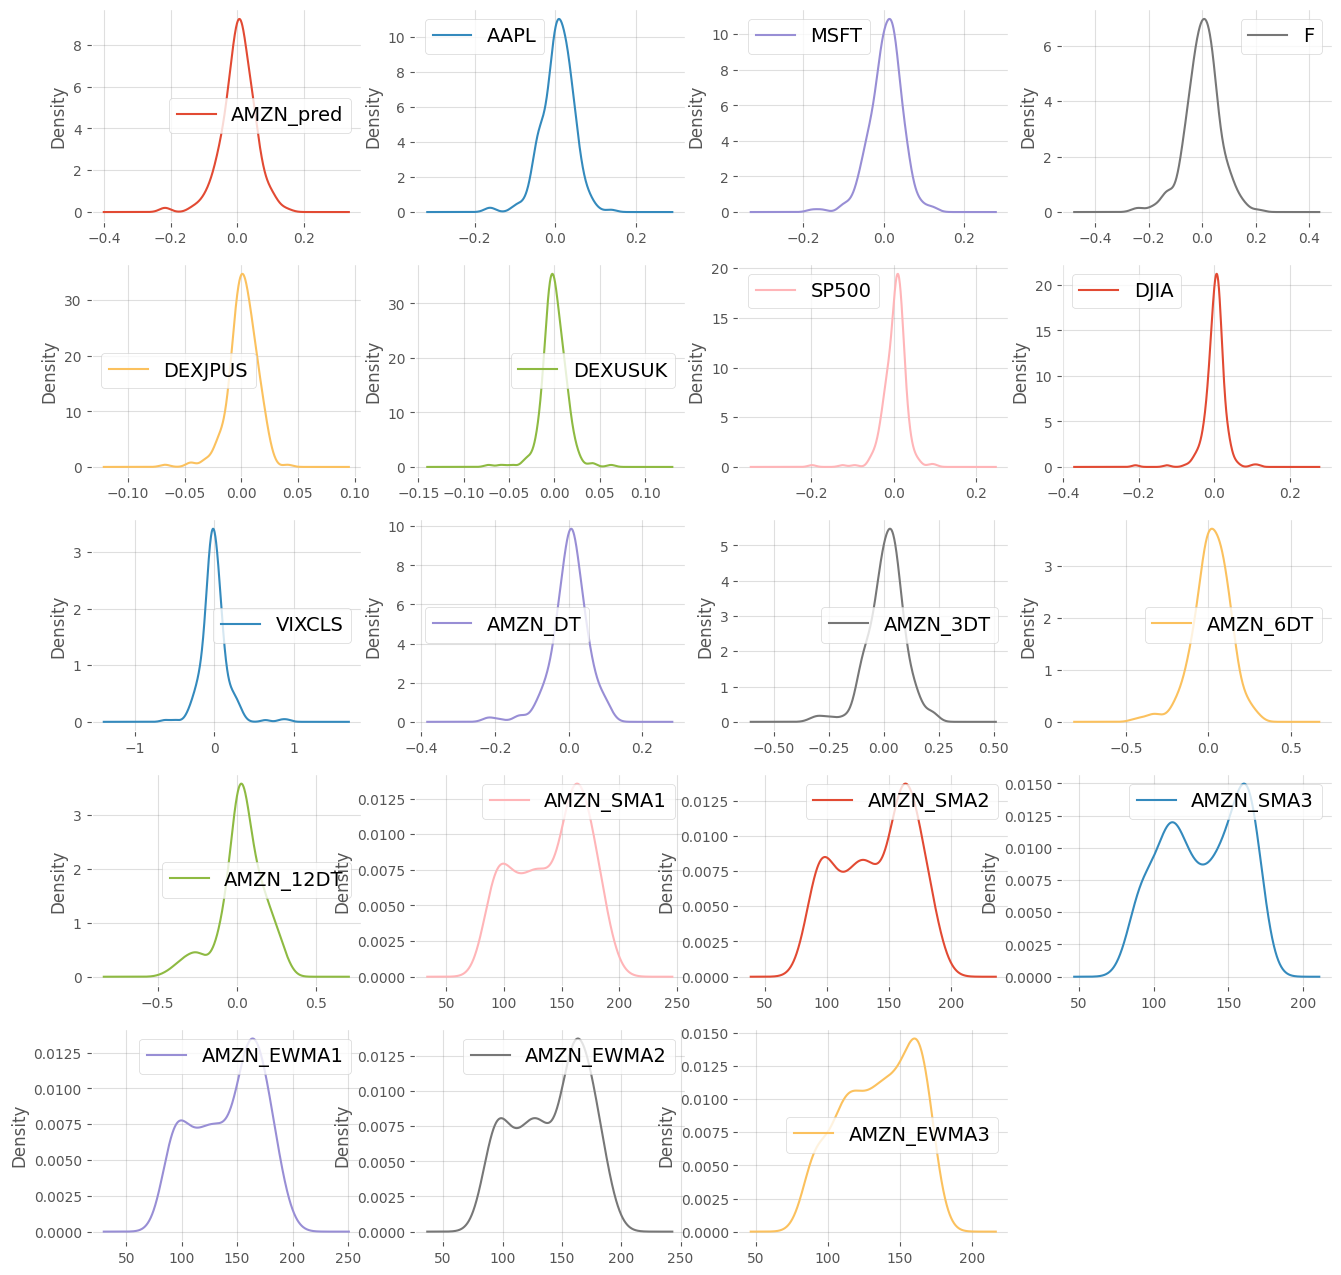

In [25]:
# Team, use this--kernel density estimation

(
    data.
    plot(kind = "density",
         subplots = True,
         layout = (5, 4),
         sharex = False,
         legend = True,
         figsize = [16, 16]
        )
)

plt.show()

<Axes: title={'center': 'Correlation Matrix'}>

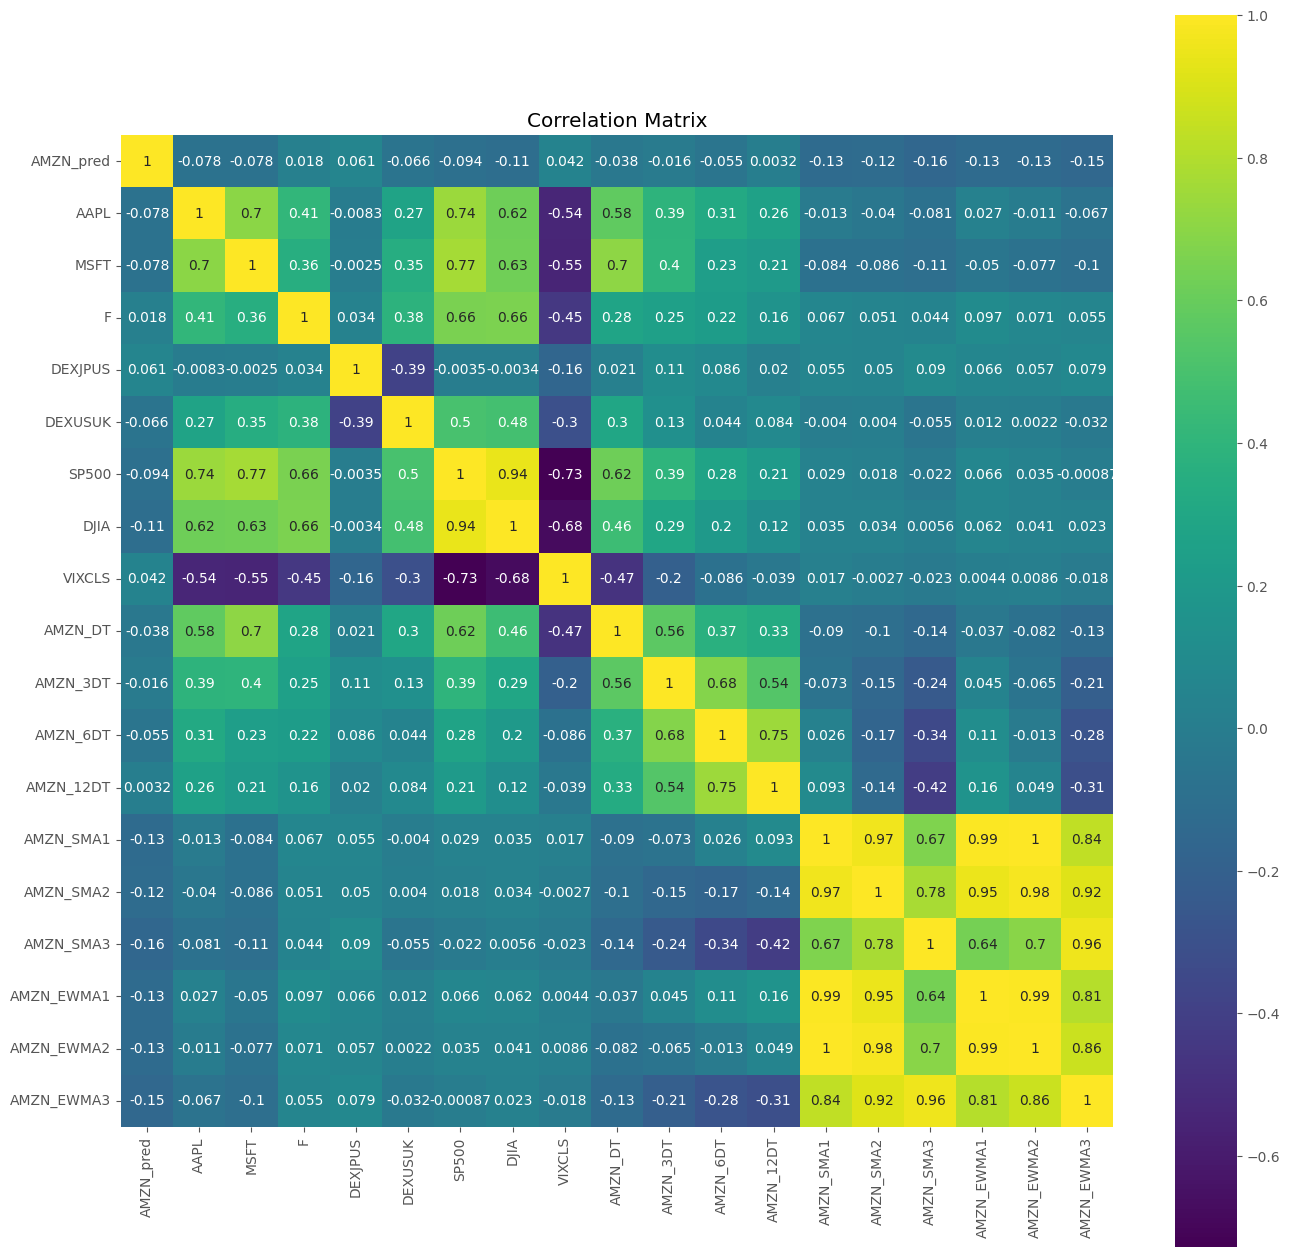

In [26]:
correlation = data.corr()

plt.figure(figsize =[16, 16]
          )

plt.title("Correlation Matrix")

sns.heatmap(correlation,
            vmax = 1,
            square = True,
            cmap = "viridis",
            annot = True)

In [27]:
validation_size = 0.25   #75% TRAIN, 25% TEST

In [28]:
train_size =\
    int(len(X) 
        * 
        (1 - validation_size)
       )

X_train, X_test =\
    (X[0         :train_size], 
     X[train_size:len(X)    ]
    )

Y_train, Y_test =\
    (Y[0         :train_size], 
     Y[train_size:len(X)    ]
    )

In [29]:
num_folds = 10
seed = 241001
scoring = "neg_mean_squared_error" 

In [30]:
models = []

In [31]:
models.append(("LR", LinearRegression()
             )
            )

models.append(("EN", ElasticNet()
             )
            )

models.append(("LASSO", Lasso()
             )
            )

models.append(("SVR", SVR()
             )
            )

models.append(("KNN", KNeighborsRegressor()
             )
            )

models.append(("CART", DecisionTreeRegressor()
             )
            )

models.append(("ETR", ExtraTreesRegressor()
              )
             )

models.append(("RFR", RandomForestRegressor()
              )
             )

models.append(("GBR", GradientBoostingRegressor()
              )
             )

models.append(("ABR", AdaBoostRegressor()
              )
             )

In [32]:
### Initialization of Lists:

names = []

kfold_results = []

train_results = []
test_results = []

# Four empty lists are initialized. 
# names will store the names of the models, 
# kfold_results will store the cross-validation results, 
# train_results and test_results 
# will store the performance of the models 
# on the training and testing datasets, respectively.

### Looping through Models:

# Let's iterate over a list of models. 

# Each element in the models list is a tuple 
# containing the name of the model (name) and the model object (model).

for name, model in models:
    
### Appending Model Names:

# The name of the current model is appended to the names list.

    names.append(name)
    
### Let's run K-fold Cross-Validation
    
    kfold =\
        (KFold(n_splits = num_folds,
               random_state = seed,
               shuffle = True)
        )
    
# A KFold object is created with a specified number of splits (num_folds), 
# a random seed (seed), 
# and shuffling enabled.
    
### Running Cross-Validation:
# Let's convert MSE to positive (Here, now it becomes lower the better; See below)

    cv_results =\
        (
         -1
         *
         cross_val_score(model, X_train, Y_train,
                         cv = kfold,   #10-fold cross validation (set)
                         scoring = scoring)
        )
        
# Cross-validation is performed on the training data (X_train, Y_train) using the current model. 
# The negative mean squared error is used 
# as the scoring metric 
# (hence multiplied by -1 to make it positive, 
# as the convention is that higher scores are better).

# Storing Cross-Validation Results:
 
### The cross-validation results for the current model are appended to the kfold_results list.    
    
    kfold_results.append(cv_results)

# Fitting the Model on the Entire Training Set:
  
    res = model.fit(X_train, Y_train) # The model is trained on the entire training dataset.

### Evaluating Model on Training Set:

# The trained model’s predictions on the training set are evaluated 
# using the mean squared error, and the result is appended to train_results.

    train_result = mean_squared_error(res.predict(X_train), Y_train)
    
    train_results.append(train_result)

## Evaluating Model on Testing Set:    
    
# Similarly, the model’s performance is evaluated 
# on the testing set and appended to test_results.
    
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    
    test_results.append(test_result)
    
# Printing the Results:

# The name of the model, 
# the average cross-validation score, 
# the standard deviation of the cross-validation scores, 
# the training set performance, 
# and the testing set performance are printed out.

    message = "%s: %f (%f) %f %f" % (name, cv_results.mean(), #10-fold cross-valiation, so need mean and std of the 10 folds
                                     cv_results.std(), 
                                     train_result, 
                                     test_result)
    print(message)

LR: 0.003631 (0.001794) 0.002665 0.001371
EN: 0.003004 (0.001485) 0.002953 0.001337
LASSO: 0.003004 (0.001485) 0.002953 0.001337
SVR: 0.003009 (0.001338) 0.002889 0.001438
KNN: 0.003660 (0.001321) 0.002377 0.001698
CART: 0.006686 (0.002149) 0.000000 0.003330
ETR: 0.003604 (0.001770) 0.000000 0.001955
RFR: 0.003627 (0.001829) 0.000496 0.001621
GBR: 0.003927 (0.001590) 0.000256 0.001954
ABR: 0.003511 (0.001602) 0.001636 0.001427


#### Comparing the algorithms by examining the cross validation results

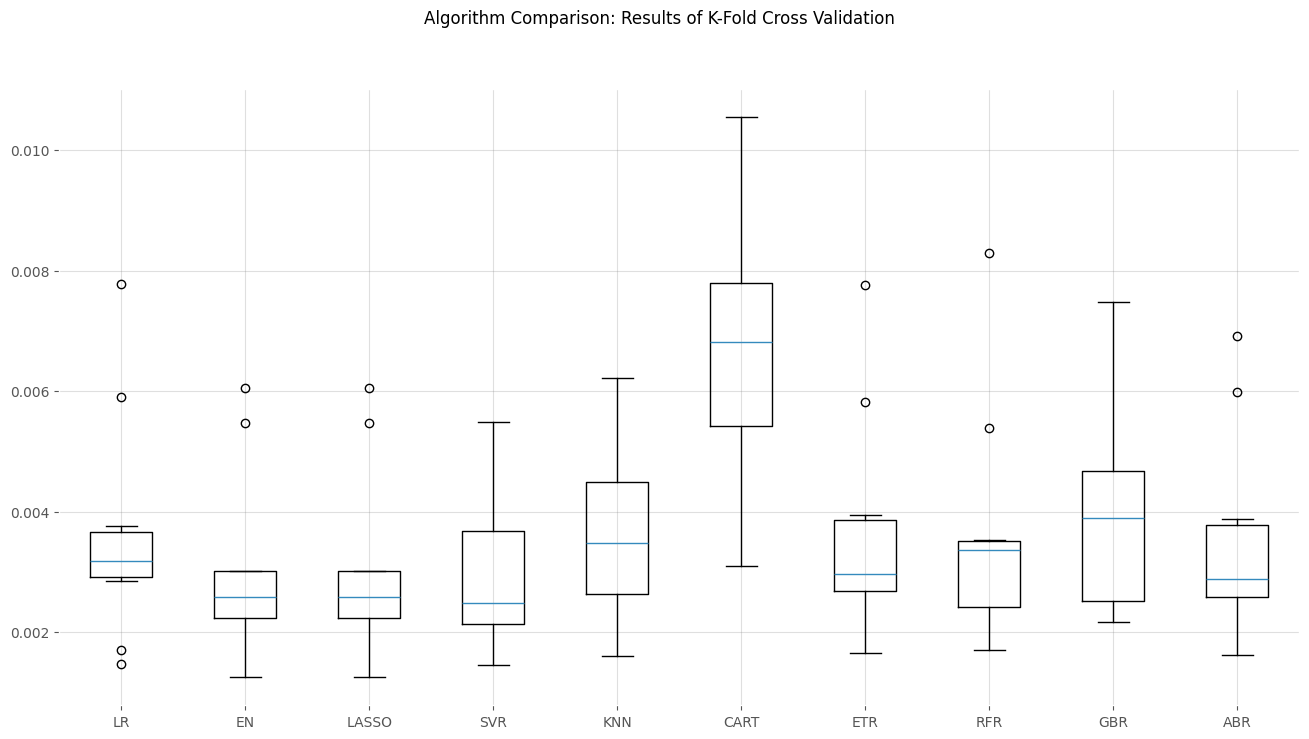

In [33]:
fig = plt.figure(figsize = [16, 8]
                )

fig.suptitle("Algorithm Comparison: Results of K-Fold Cross Validation")

ax = fig.add_subplot(111)

plt.boxplot(kfold_results)

ax.set_xticklabels(names)

plt.show()

#### ARIMA

In [34]:
# Basic Set-up for ARIMA

X_train_ARIMA =\
    (X_train
    .loc[ : , :]
   )

X_test_ARIMA =\
    (X_test
    .loc[ : , :]
)    

train_len = len(X_train_ARIMA)
test_len = len(X_test_ARIMA)
total_len = len(X)

In [35]:
modelARIMA =\
(    stats
     .ARIMA(endog = Y_train,
                exog = X_train_ARIMA,
                order = [1, 0, 0]   # Hyperparameters to be tuned
            )
)

model_fit = modelARIMA.fit()

/Users/benny/Desktop/qf627/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/benny/Desktop/qf627/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/benny/Desktop/qf627/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/benny/Desktop/qf627/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
 

In [36]:
error_training_ARIMA =\
(    mean_squared_error(Y_train,
                       model_fit.fittedvalues)
)

predicted =\
(
    model_fit
    .predict(start = train_len - 1,
             end = total_len - 1,
             exog = X_test_ARIMA)[1: ]
)

/Users/benny/Desktop/qf627/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [37]:
error_testing_ARIMA =\
(    mean_squared_error(Y_test,
                        predicted)
)

error_testing_ARIMA

0.0013708133088204755

In [38]:
test_results.append(error_testing_ARIMA)

train_results.append(error_training_ARIMA)

names.append("ARIMA")

### Comparison of Algorithms

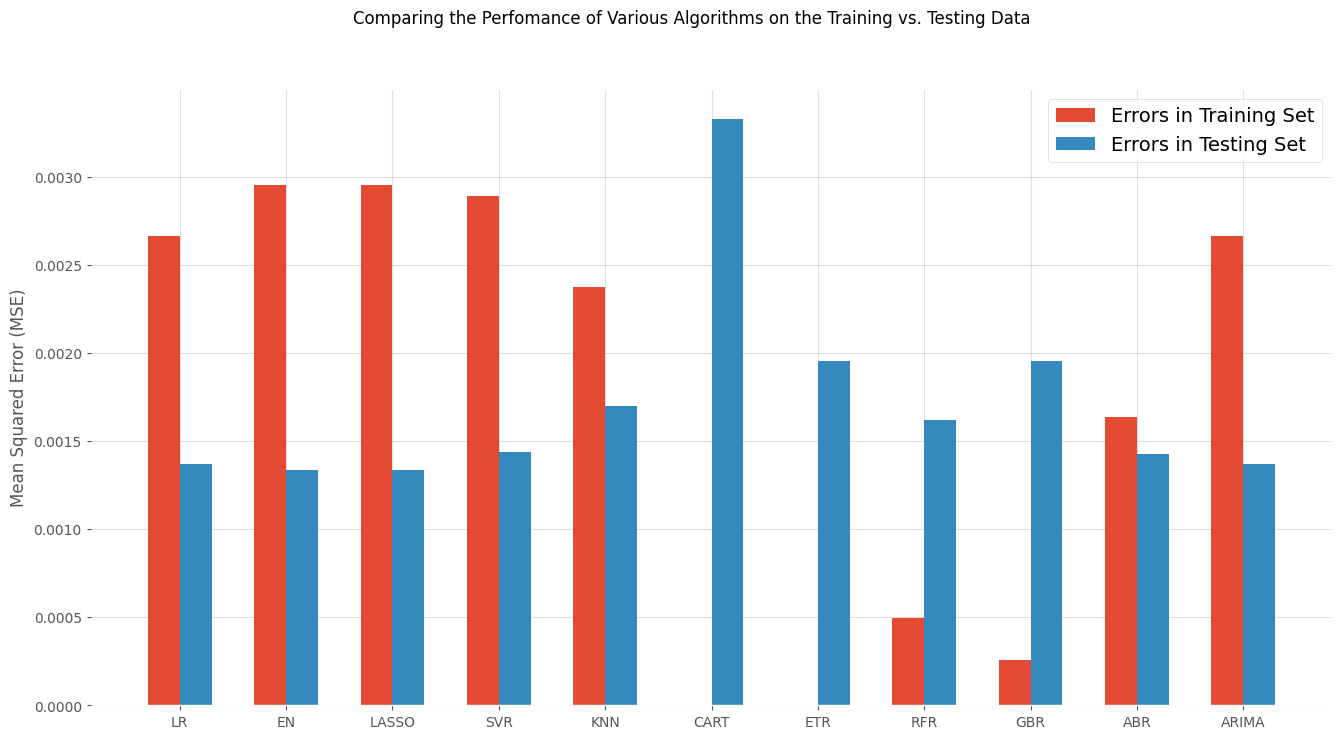

In [39]:
fig = plt.figure(figsize = [16, 8])

ind = np.arange(len(names)
               )

width = 0.30

fig.suptitle("Comparing the Perfomance of Various Algorithms on the Training vs. Testing Data")

ax = fig.add_subplot(111)

(plt
 .bar(ind - width/2,
    
      # Team, this line calculates the starting x position of the bars 
      # representing "Errors in Training Set". 
      # The width/2 term is used to shift the bars to the left, 
      # so they are centered around the tick mark for each group (algorithm) on the x-axis.
      
      # The bar chart will have two sets of bars for each algorithm: 
      # one for training errors and one for testing errors. 
      
      # By subtracting width/2 from ind, 
      # the training error bars are positioned to the left of the center of the tick marks. 
      
      train_results,
      width = width,
      label = "Errors in Training Set")
)

(plt
 .bar(ind + width/2,
      test_results,
      width = width,
      label = "Errors in Testing Set")
)

plt.legend()

ax.set_xticks(ind)
ax.set_xticklabels(names)

plt.ylabel("Mean Squared Error (MSE)")

plt.show()

# Get predicted results from chosen model

In [40]:
model=Lasso()

In [41]:
# Fitting the Model on the Entire Training Set:
  
res = model.fit(X_train, Y_train) # The model is trained on the entire training dataset.

### Evaluating Model on Training Set:

# The trained model’s predictions on the training set are evaluated 
# using the mean squared error, and the result is appended to train_results.

train_result = res.predict(X_train)


## Evaluating Model on Testing Set:    

# Similarly, the model’s performance is evaluated 
# on the testing set and appended to test_results.

test_result = res.predict(X_test)

In [42]:
X_train

,AAPL,MSFT,F,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,AMZN_DT,AMZN_3DT,AMZN_6DT,AMZN_12DT,AMZN_SMA1,AMZN_SMA2,AMZN_SMA3,AMZN_EWMA1,AMZN_EWMA2,AMZN_EWMA3
2019-10-30,0.000329,0.052309,-0.075529,0.002207,-0.001087,0.013964,0.013060,-0.127736,0.010062,0.033127,-0.020832,-0.011945,87.598381,88.978833,87.897801,88.417659,88.386134,89.282341
2019-11-06,0.055879,-0.003810,0.043535,-0.000184,0.000000,0.009802,0.011188,0.023248,0.008826,0.010265,0.015398,0.019081,88.443071,88.953238,88.072990,89.284756,88.768160,89.303063
2019-11-14,0.012297,0.026000,-0.011312,-0.010012,0.003890,0.003704,0.003865,0.024827,-0.018969,-0.014811,0.017350,-0.047916,88.862190,88.860341,88.171756,88.652045,88.687316,89.261217
2019-11-22,-0.015090,0.000860,-0.006727,-0.001196,-0.005597,-0.003264,-0.004627,0.023781,0.003575,-0.025853,0.007936,-0.052240,88.460857,88.627468,88.396841,87.654924,88.212527,89.144393
2019-12-02,0.009051,-0.000267,0.013408,0.001284,0.003950,-0.006329,-0.010150,0.228018,0.020345,-0.002399,0.013614,-0.007025,88.732096,88.701341,88.586436,88.969698,88.641982,89.172406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-15,0.029682,0.067865,0.062096,0.011886,0.016990,0.030258,0.016836,0.060409,0.022757,0.085018,0.204033,0.201143,121.361905,109.434762,108.346508,124.715641,118.592730,109.917462
2023-06-23,0.003595,-0.038300,-0.030210,0.013726,-0.008936,-0.013990,-0.016808,-0.007413,0.017314,0.052055,0.160161,0.279136,124.013334,111.671270,108.744921,126.546036,121.055544,110.757428
2023-07-03,0.038074,0.028175,0.077040,0.006596,-0.002282,0.028865,0.020659,-0.048895,0.022443,0.053551,0.097270,0.226663,126.735238,114.450318,109.178968,128.461417,123.707962,111.820910
2023-07-12,-0.008187,-0.002813,-0.008505,-0.044920,0.022022,0.005682,0.001713,-0.046184,0.003216,0.039135,0.085261,0.215433,128.171428,117.047461,109.552857,129.022901,125.523799,112.833331


In [43]:
Train_result = pd.DataFrame(data=train_result,
                            index=X_train.index, 
                            columns=["Result"])

In [44]:
Test_result = pd.DataFrame(data=test_result, 
                            index=X_test.index, 
                            columns=["Result"])

In [45]:
Overall_results = pd.concat([Train_result, Test_result], 
                            axis=0)
Overall_results

,Result
2019-10-30,0.002432
2019-11-06,0.002432
2019-11-14,0.002432
2019-11-22,0.002432
2019-12-02,0.002432
...,...
2024-09-11,0.002432
2024-09-18,0.002432
2024-09-25,0.002432
2024-10-02,0.002432


In [46]:
Combined_df = pd.merge(data,Overall_results,left_index=True,right_index=True)

In [47]:
Combined_df

,AMZN_pred,AAPL,MSFT,F,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,AMZN_DT,AMZN_3DT,AMZN_6DT,AMZN_12DT,AMZN_SMA1,AMZN_SMA2,AMZN_SMA3,AMZN_EWMA1,AMZN_EWMA2,AMZN_EWMA3,Result
2019-10-30,0.008826,0.000329,0.052309,-0.075529,0.002207,-0.001087,0.013964,0.013060,-0.127736,0.010062,0.033127,-0.020832,-0.011945,87.598381,88.978833,87.897801,88.417659,88.386134,89.282341,0.002432
2019-11-06,-0.024042,0.055879,-0.003810,0.043535,-0.000184,0.000000,0.009802,0.011188,0.023248,0.008826,0.010265,0.015398,0.019081,88.443071,88.953238,88.072990,89.284756,88.768160,89.303063,0.002432
2019-11-14,-0.011401,0.012297,0.026000,-0.011312,-0.010012,0.003890,0.003704,0.003865,0.024827,-0.018969,-0.014811,0.017350,-0.047916,88.862190,88.860341,88.171756,88.652045,88.687316,89.261217,0.002432
2019-11-22,0.020345,-0.015090,0.000860,-0.006727,-0.001196,-0.005597,-0.003264,-0.004627,0.023781,0.003575,-0.025853,0.007936,-0.052240,88.460857,88.627468,88.396841,87.654924,88.212527,89.144393,0.002432
2019-12-02,-0.018176,0.009051,-0.000267,0.013408,0.001284,0.003950,-0.006329,-0.010150,0.228018,0.020345,-0.002399,0.013614,-0.007025,88.732096,88.701341,88.586436,88.969698,88.641982,89.172406,0.002432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-11,0.010298,0.008162,0.033996,-0.046737,-0.018110,-0.008789,0.006151,-0.002768,-0.186646,0.062561,0.031043,0.015346,-0.066461,175.891905,182.084762,165.413135,177.256812,176.924621,170.904754,0.002432
2024-09-18,0.032196,-0.008887,0.018200,0.049473,0.001481,0.013117,0.011480,0.015575,0.030069,0.010298,0.074071,0.140892,-0.066956,178.677143,182.250477,166.288214,182.998592,179.591483,171.657377,0.002432
2024-09-25,-0.041194,0.025412,0.003013,-0.052348,0.017322,0.010476,0.018342,0.009870,-0.168052,0.032196,0.105055,0.123102,-0.002542,182.209524,182.586032,167.475516,189.103029,183.242270,172.668199,0.002432
2024-10-02,0.002217,0.001810,-0.035282,0.005742,0.011293,-0.005036,-0.002225,0.006700,0.204145,-0.041194,0.001300,0.032342,-0.008891,185.283811,181.783810,168.669286,187.439611,184.269374,173.369067,0.002432


### <font color = red> Answer 1 is presented in the cell below: </font>

<Axes: >

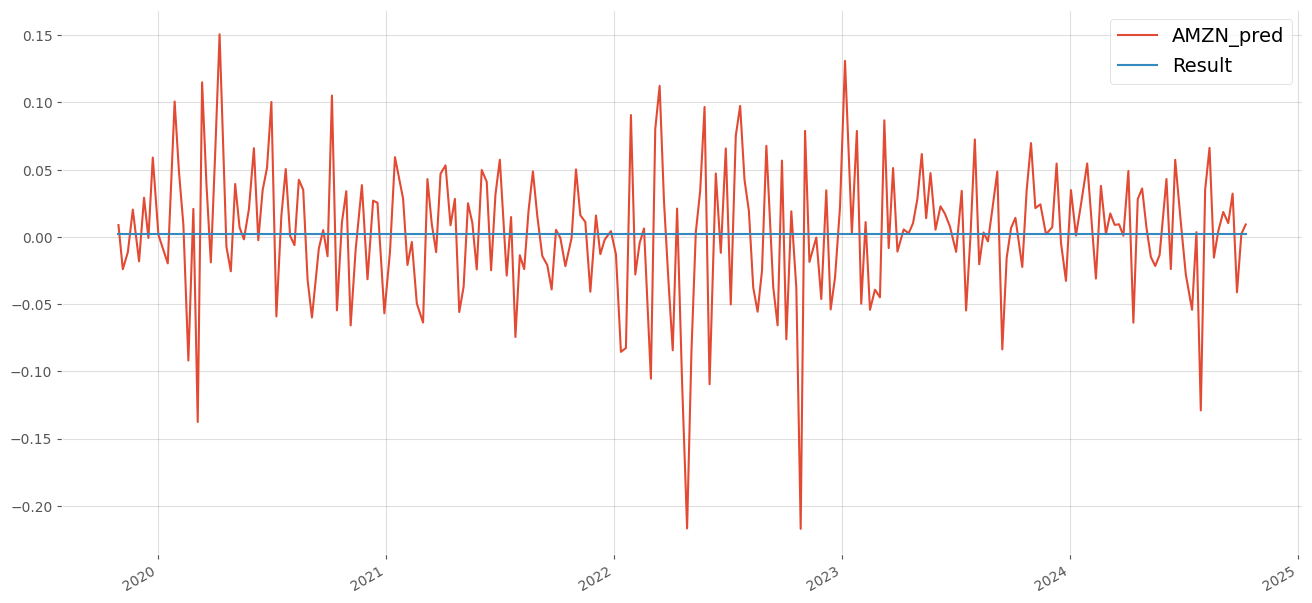

In [48]:
Combined_df \
    [["AMZN_pred", "Result"]] \
    .plot(figsize = (16, 8)
         )

## <font color = blue> 👉 Questions 2 to 5 ask you to build, execute, and backtest a mean-reversion strategy, using `Relative Strength Index` (`RSI`). </font>

#### The Relative Strength Index (RSI) is an indicator that uses the closing prices of an asset to identify oversold and overbought conditions. 

> Most commonly, RSI is calculated using a 14-day period, and measured on a scale from zero to 100. (It is an oscillator.)

> Traders usually buy an asset when it is oversold (when its RSI is below 30) and sell when it is overbought (when its RSI is above 70). 

> More extreme overbought and oversold levels, such as 80 and 20, are used less frequently, and imply stronger momentum.

#### You are asked to build a trading strategy with the following set of rules.

### <font color = green> NOTE: Apple (`AAPL`) as our security of interest. The `investment horizon` will be three years between 2015 and 2017; your `capital` is USD 100,000; and there is a USD 5 flat `commission fee` per trade.

- You can go long and short.
<br>

- To calculate RSI, use 14 periods (trading days).
<br>

- Enter a long position if RSI crosses the lower threshold (standard value of 30), moving upwards. Exit the position when RSI becomes higher than the middle level (value of 50).
<br>

- Enter a short position if RSI crosses the upper threshold (standard value of 70), moving downwards. Exit the position when RSI becomes less than 50.
<br>

- Only one position can be open at a time.

### <font color = green> NOTE: The RSI is defined as follows:
    
### Calculating the RSI first requires the RS which requires an average value of n-many previous trading days. 
<br>
    
- As discussed, a value of 14 days is common for the RSI calculation. 
<br>
    
- The first RS value requires the price from all 14 of the first trading days. Often, this is a source of confusion with the RSI given successive values only require the most recent. 
   
    
    Step 1. For 14 periods, calculate the difference in price from the current period and the previous period
    
    Step 2. For each period, record each positive change in price as a gain and each negative change as a loss
    
    Step 3. On the 14th period, calculate the arithmetic mean of the gains and losses for the entire 14 day period (e.g. gains / 14 & losses / 14)
    
    Step 4. Use these values to calculate the RS
    
### <center> $ RS = \frac{AverageGain}{AverageLoss} $
    
    Step 5. Use the RS value to calculate the RSI
    
    Step 6. For each proceeding period, use only the previous RSI value to calculate the next average value 
    by multiplying by our lookback period – 1 (e.g., 13 for a lookback of 14).
    
    Step 7. Add the value obtained in Step 6 to the current day’s value (run this for both the gains and losses)
    
### <center> $ RSI = 100 - \frac{100}{1 + RS} $

### Visualize your buy and sell positions.

https://www.investopedia.com/terms/r/rsi.asp

### Below are the lines of code that lead to an answer:

# Refer to Lesson 3

In [49]:
RSI_start = "2015-01-01"
RSI_end = "2018-01-01"

Initial_Capital = 100000
Commission = 5

In [50]:
RSI_lookback = 14
RSI_upper = 70
RSI_lower = 30
RSI_middle = 50

In [51]:
RSI_ticker = ["AAPL"]

RSI_stock_data = yf.download(RSI_ticker, 
                             start=RSI_start, 
                             end=RSI_end)

[*********************100%%**********************]  1 of 1 completed


In [52]:
RSI_stock_data = RSI_stock_data[["Adj Close"]]

In [53]:
RSI_stock_data["Returns"] = \
    (
        RSI_stock_data["Adj Close"]
        .pct_change()
    )

RSI_stock_data["Positive_Returns"] = \
    (
        np.where(RSI_stock_data["Returns"] >0, 
                 RSI_stock_data["Returns"], 
                 0)
    )

RSI_stock_data["Negative_Returns"] = \
    (
        np.where(RSI_stock_data["Returns"] <0, 
                 abs(RSI_stock_data["Returns"]), 
                 0)
    )

In [54]:
RSI_stock_data.head(15)

,Adj Close,Returns,Positive_Returns,Negative_Returns
Date,,,,
2015-01-02,24.373959,NaN,0.000000,0.000000
2015-01-05,23.687302,-0.028172,0.000000,0.028172
2015-01-06,23.689535,0.000094,0.000094,0.000000
2015-01-07,24.021713,0.014022,0.014022,0.000000
2015-01-08,24.944687,0.038422,0.038422,0.000000
2015-01-09,24.971436,0.001072,0.001072,0.000000
2015-01-12,24.356127,-0.024641,0.000000,0.024641
2015-01-13,24.572376,0.008879,0.008879,0.000000
2015-01-14,24.478741,-0.003811,0.000000,0.003811


In [55]:
# Initialize columns for RS and RSI
RSI_stock_data["RS"] = np.nan
RSI_stock_data["RSI"] = np.nan

# Compute the initial average gain and loss for the first RSI value
initial_gain = \
    (
        RSI_stock_data["Positive_Returns"]
        .rolling(RSI_lookback)
        .mean()
    )
    
initial_loss = \
    (
        RSI_stock_data["Negative_Returns"]
        .rolling(RSI_lookback)
        .mean()
    )

# Calculate RS and RSI for the first RSI_lookback window
RSI_stock_data.iloc[RSI_lookback, RSI_stock_data.columns.get_loc("RS")] = \
    (
        initial_gain.iloc[RSI_lookback] 
        / 
        initial_loss.iloc[RSI_lookback]
    )
    
RSI_stock_data.iloc[RSI_lookback, RSI_stock_data.columns.get_loc("RSI")] = \
    (
        100 
        -
        (
            100
            /
            (1 + RSI_stock_data.iloc[RSI_lookback, RSI_stock_data.columns.get_loc("RS")])
        )
    )

# Loop to calculate RSI for all subsequent days (using smoothed averages)
for row in range(RSI_lookback + 1, len(RSI_stock_data)):
    
    gain = RSI_stock_data.iloc[row, RSI_stock_data.columns.get_loc("Positive_Returns")]
    loss = RSI_stock_data.iloc[row, RSI_stock_data.columns.get_loc("Negative_Returns")]

    # Smoothed average gain and loss using exponential decay
    previous_gain = initial_gain.iloc[row - 1]
    previous_loss = initial_loss.iloc[row - 1]

    smoothed_gain = (previous_gain * (RSI_lookback - 1) + gain) / RSI_lookback
    smoothed_loss = (previous_loss * (RSI_lookback - 1) + loss) / RSI_lookback

    # Update RS and RSI
    RSI_stock_data.iloc[row, RSI_stock_data.columns.get_loc("RS")] = smoothed_gain / smoothed_loss
    
    RSI_stock_data.iloc[row, RSI_stock_data.columns.get_loc("RSI")] = \
        (
            100 
            - 
            (
                100 
                / 
                (1 + RSI_stock_data.iloc[row, RSI_stock_data.columns.get_loc("RS")])
            )
        )

In [56]:
# Shift RSI to compare with the previous day’s value

RSI_stock_data["Previous_RSI"] = \
    (
        RSI_stock_data["RSI"].shift(1)
    )

In [57]:
# This measures the distance the RSI is from the middle

RSI_stock_data["distance"] = \
    (
        RSI_stock_data["RSI"] 
        - 
        RSI_middle
    )

In [58]:
RSI_stock_data.head(15)

,Adj Close,Returns,Positive_Returns,Negative_Returns,RS,RSI,Previous_RSI,distance
Date,,,,,,,,
2015-01-02,24.373959,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
2015-01-05,23.687302,-0.028172,0.000000,0.028172,NaN,NaN,NaN,NaN
2015-01-06,23.689535,0.000094,0.000094,0.000000,NaN,NaN,NaN,NaN
2015-01-07,24.021713,0.014022,0.014022,0.000000,NaN,NaN,NaN,NaN
2015-01-08,24.944687,0.038422,0.038422,0.000000,NaN,NaN,NaN,NaN
2015-01-09,24.971436,0.001072,0.001072,0.000000,NaN,NaN,NaN,NaN
2015-01-12,24.356127,-0.024641,0.000000,0.024641,NaN,NaN,NaN,NaN
2015-01-13,24.572376,0.008879,0.008879,0.000000,NaN,NaN,NaN,NaN
2015-01-14,24.478741,-0.003811,0.000000,0.003811,NaN,NaN,NaN,NaN


In [59]:
# Enter short (-1) when RSI crosses below the upper bound (from above 70 to below 70)
RSI_stock_data["Position"]=\
    (
        np.where((RSI_stock_data["RSI"] 
                < 
                RSI_upper)
                &
                (RSI_stock_data["Previous_RSI"] 
                > 
                RSI_upper),
                -1,
                np.nan)
    )

# Enter long (1) when RSI crosses above the lower bound (from below 30 to above 30)
RSI_stock_data["Position"]=\
    (
        np.where((RSI_stock_data["RSI"] 
                > 
                RSI_lower)
                &
                (RSI_stock_data["Previous_RSI"] 
                < 
                RSI_lower),
                1,
                RSI_stock_data["Position"])
    )
    
# Set market neutral (0) when distance changes sign (crosses the 50 level)
RSI_stock_data["Position"] =\
    (
        np.where(RSI_stock_data["distance"] * RSI_stock_data["distance"].shift(1) < 0, 
                0, 
                RSI_stock_data["Position"]
                )
    )  
    
    

In [60]:
RSI_stock_data["Position"] =\
    (RSI_stock_data["Position"]
     .ffill()
    )

In [61]:
RSI_stock_data["Position"].fillna(value=0,
                                  inplace=True)

In [62]:
RSI_stock_data["Trades"]=\
(
    RSI_stock_data["Position"]
    .diff()
)

In [63]:
RSI_stock_data.dropna(inplace=True)

In [64]:
RSI_stock_data

,Adj Close,Returns,Positive_Returns,Negative_Returns,RS,RSI,Previous_RSI,distance,Position,Trades
Date,,,,,,,,,,
2015-01-26,25.214441,0.001062,0.001062,0.000000,1.400594,58.343647,58.125685,8.343647,0.0,0.0
2015-01-27,24.331600,-0.035013,0.000000,0.035013,1.267652,55.901520,58.343647,5.901520,0.0,0.0
2015-01-28,25.707142,0.056533,0.056533,0.000000,1.920277,65.756668,55.901520,15.756668,0.0,0.0
2015-01-29,26.507486,0.031133,0.031133,0.000000,2.074352,67.472824,65.756668,17.472824,0.0,0.0
2015-01-30,26.119579,-0.014634,0.000000,0.014634,1.430302,58.852853,67.472824,8.852853,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2017-12-22,41.216564,0.000000,0.000000,0.000000,1.788216,64.134779,60.843236,14.134779,0.0,0.0
2017-12-26,40.170921,-0.025369,0.000000,0.025369,1.067149,51.624192,64.134779,1.624192,0.0,0.0
2017-12-27,40.177986,0.000176,0.000176,0.000000,1.137277,53.211504,51.624192,3.211504,0.0,0.0


### <font color = red> Answer 2 is presented in the cell below: </font>

In [65]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=RSI_stock_data.index, 
        y=RSI_stock_data["Adj Close"], 
        mode='lines', 
        line=dict(color='grey', width=0.75), 
        name='Adj Close'
    )
)

fig.add_trace(
    go.Scatter(
        x=RSI_stock_data.index, 
        y=RSI_stock_data["Position"], 
        mode='lines', 
        line=dict(color='orange', width=0.75), 
        name='Position',
        yaxis='y2'  # Assign to secondary axis
    )
)

fig.update_layout(
    title='Apple Price and Position',
    xaxis_title='Date',
    yaxis_title='Apple Price',
    yaxis2=dict(
        title="Position", 
        overlaying='y', 
        side='right'
    ),
    width=1200,  
    height=600,  
    legend=dict(
        x=0.6,
        y=1.15,
        xanchor='center',
        yanchor='top',
        orientation='h',
        traceorder='normal',
        bordercolor='Black',
        borderwidth=1
    )
)

# Show figure
fig.show()

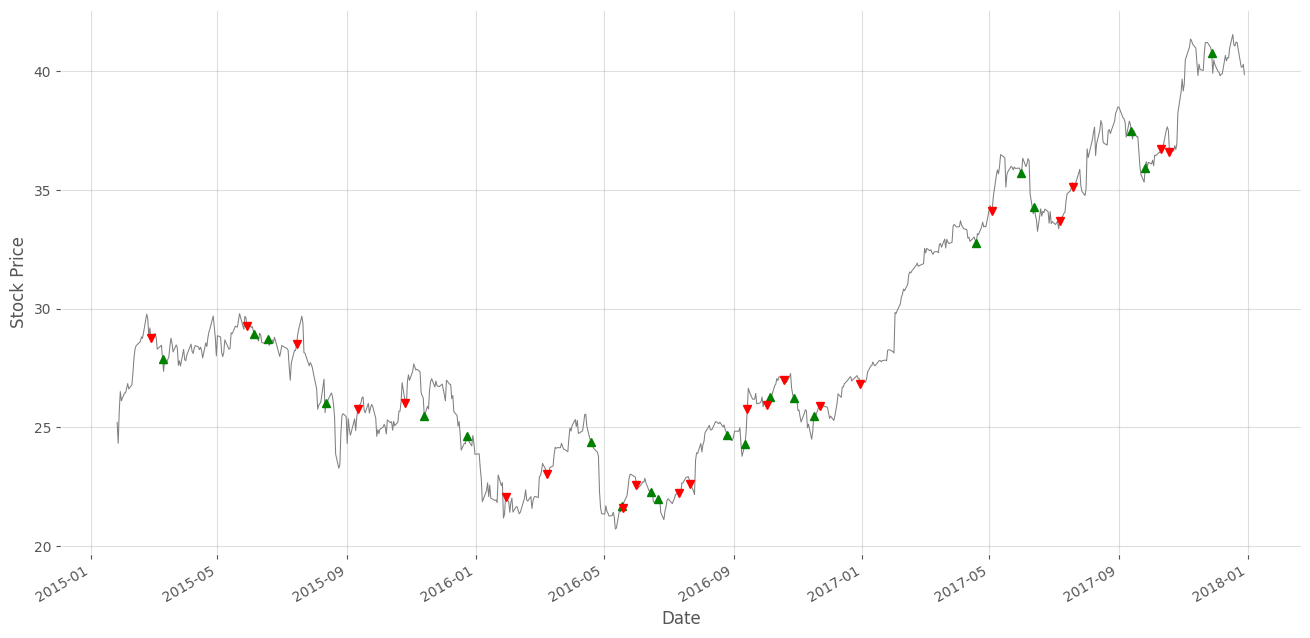

In [66]:
fig =\
(
    plt
    .figure(figsize = [16, 8]
           )
)

sub =\
(
    fig
    .add_subplot(111,
                 ylabel = "Stock Price")
)

(
    RSI_stock_data["Adj Close"]
    .plot(ax = sub,
          color = "grey",
          linewidth = 0.75)
)


# BUY signal

(
    sub
    .plot(RSI_stock_data.loc[RSI_stock_data.Trades == 1.0].index,
          RSI_stock_data["Adj Close"][RSI_stock_data.Trades == 1.0],
          "^",
          color = "green",
          markersize = 6)
)

# SELL signal

(
    sub
    .plot(RSI_stock_data.loc[RSI_stock_data.Trades == -1.0].index,
          RSI_stock_data["Adj Close"][RSI_stock_data.Trades == -1.0],
          "v",
          color = "red",
          markersize = 6)
)

In [67]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=RSI_stock_data.index, 
        y=RSI_stock_data["Adj Close"], 
        mode='lines', 
        line=dict(color='grey', width=0.75), 
        name='Adj Close'
    )
)


fig.add_trace(
    go.Scatter(
        x=RSI_stock_data.loc[RSI_stock_data.Trades == 1.0].index, 
        y=RSI_stock_data["Adj Close"][RSI_stock_data.Trades == 1.0], 
        mode='markers', 
        marker=dict(symbol='triangle-up', color='green', size=10), 
        name='BUY Signal'
    )
)

fig.add_trace(
    go.Scatter(
        x=RSI_stock_data.loc[RSI_stock_data.Trades == -1.0].index, 
        y=RSI_stock_data["Adj Close"][RSI_stock_data.Trades == -1.0], 
        mode='markers', 
        marker=dict(symbol='triangle-down', color='red', size=10), 
        name='SELL Signal'
    )
)

fig.update_layout(
    title='Apple with Buy/Sell Signals using RSI',
    xaxis_title='Date',
    yaxis_title='Stock Price',
    width=1200,  
    height=600   
)

# Show figure
fig.show()

### <font color = blue> 👉 Question 3</font>. How much in cumulative returns could you have had as a result of the RSI strategy?

### Below are the lines of code that lead to an answer:

# Refer to Problem Set 5 Question 2

In [68]:
RSI_stock_data["strategy_returns"] =\
    (
        RSI_stock_data["Position"]
        .shift(1) 
        * 
        RSI_stock_data["Returns"]
    )

RSI_stock_data["strategy_cumulative_returns"] = \
    (
        1
        +
        RSI_stock_data["strategy_returns"]
    ).cumprod()

In [69]:
# Initialize the Capital column with NaN values
RSI_stock_data["Capital"] = np.nan

# Set the first value of Capital to the initial value (Initial_Capital )
RSI_stock_data.iloc[0, RSI_stock_data.columns.get_loc("Capital")] = Initial_Capital 

# Loop through each row starting from the second row to calculate capital
for row in range(1, len(RSI_stock_data)):
    
    # Update the capital based on the previous capital and strategy returns
    RSI_stock_data.iloc[row, RSI_stock_data.columns.get_loc("Capital")] = \
        (
            RSI_stock_data.iloc[row-1, RSI_stock_data.columns.get_loc("Capital")] 
            * 
            (1+RSI_stock_data.iloc[row, RSI_stock_data.columns.get_loc("strategy_returns")])
        ) - abs(RSI_stock_data.iloc[row, RSI_stock_data.columns.get_loc("Trades")]) * Commission

In [70]:
Cumulative_Returns = \
    (
        RSI_stock_data.iloc[-1, RSI_stock_data.columns.get_loc("Capital")]
        / 
        Initial_Capital - 1
    )*100
    
Cumulative_Returns 

-41.808099946115654

In [71]:
print(f'The cumulative returns from the RSI strategy for Apple is {Cumulative_Returns:.2f}%')

The cumulative returns from the RSI strategy for Apple is -41.81%


### <font color = red> Answer 3 </font>

    The answer is -48.38 % .

### <font color = blue> 👉 Question 4</font>. Now please find the `five` worst drawdown periods over the investment horizon and provide their net drawdown in % and duration, respectively.

### <font color = green> The question asks you to find the five worst drawdown periods, beyond identifying max drawdown (MDD).

### Below are the lines of code that lead to an answer:

# Refer to Lesson 4 Part 1, Problem Set 4 REview Q4 and Problem Set 5 REview Q3

In [72]:
df_drawdown =\
(
    RSI_stock_data[["strategy_returns"]]
)

df_drawdown

,strategy_returns
Date,
2015-01-26,NaN
2015-01-27,-0.0
2015-01-28,0.0
2015-01-29,0.0
2015-01-30,-0.0
...,...
2017-12-22,0.0
2017-12-26,-0.0
2017-12-27,0.0


<Axes: xlabel='Date'>

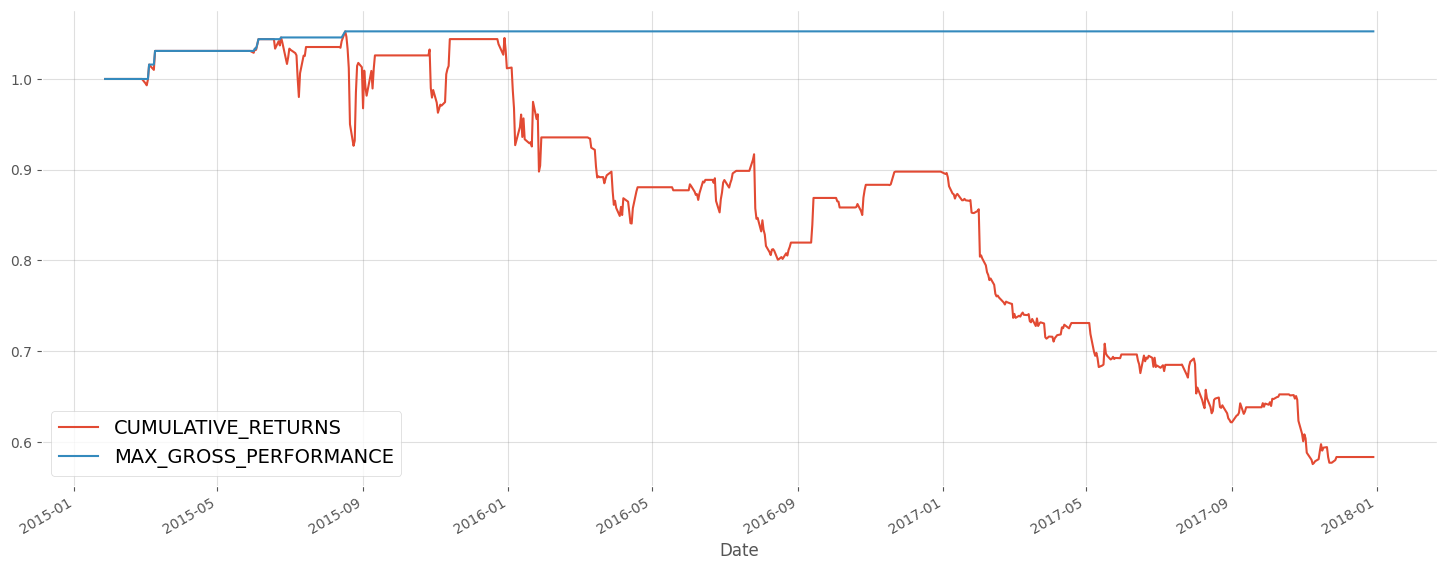

In [73]:
df_drawdown["CUMULATIVE_RETURNS"] =\
(
    (1+df_drawdown["strategy_returns"]).cumprod()
)

df_drawdown["MAX_GROSS_PERFORMANCE"]=\
(
    df_drawdown
    ["CUMULATIVE_RETURNS"]
    .cummax()
)

(
    df_drawdown
    [["CUMULATIVE_RETURNS", "MAX_GROSS_PERFORMANCE"]]
).plot(figsize = [18, 7]
      )

In [74]:
df_drawdown

,strategy_returns,CUMULATIVE_RETURNS,MAX_GROSS_PERFORMANCE
Date,,,
2015-01-26,NaN,NaN,NaN
2015-01-27,-0.0,1.000000,1.000000
2015-01-28,0.0,1.000000,1.000000
2015-01-29,0.0,1.000000,1.000000
2015-01-30,-0.0,1.000000,1.000000
...,...,...,...
2017-12-22,0.0,0.583372,1.052472
2017-12-26,-0.0,0.583372,1.052472
2017-12-27,0.0,0.583372,1.052472


In [75]:
df_drawdown["DRAWDOWN"] =\
(
    df_drawdown["MAX_GROSS_PERFORMANCE"] - df_drawdown["CUMULATIVE_RETURNS"]
)

In [76]:
df_drawdown

,strategy_returns,CUMULATIVE_RETURNS,MAX_GROSS_PERFORMANCE,DRAWDOWN
Date,,,,
2015-01-26,NaN,NaN,NaN,NaN
2015-01-27,-0.0,1.000000,1.000000,0.0000
2015-01-28,0.0,1.000000,1.000000,0.0000
2015-01-29,0.0,1.000000,1.000000,0.0000
2015-01-30,-0.0,1.000000,1.000000,0.0000
...,...,...,...,...
2017-12-22,0.0,0.583372,1.052472,0.4691
2017-12-26,-0.0,0.583372,1.052472,0.4691
2017-12-27,0.0,0.583372,1.052472,0.4691


In [77]:
max_drawdown = df_drawdown["DRAWDOWN"].max()

In [78]:
max_drawdown

0.4768864351247428

In [79]:
df_drawdown[df_drawdown["DRAWDOWN"] == 0].index

DatetimeIndex(['2015-01-27', '2015-01-28', '2015-01-29', '2015-01-30',
               '2015-02-02', '2015-02-03', '2015-02-04', '2015-02-05',
               '2015-02-06', '2015-02-09', '2015-02-10', '2015-02-11',
               '2015-02-12', '2015-02-13', '2015-02-17', '2015-02-18',
               '2015-02-19', '2015-02-20', '2015-02-23', '2015-02-24',
               '2015-02-25', '2015-02-26', '2015-02-27', '2015-03-05',
               '2015-03-10', '2015-03-11', '2015-03-12', '2015-03-13',
               '2015-03-16', '2015-03-17', '2015-03-18', '2015-03-19',
               '2015-03-20', '2015-03-23', '2015-03-24', '2015-03-25',
               '2015-03-26', '2015-03-27', '2015-03-30', '2015-03-31',
               '2015-04-01', '2015-04-02', '2015-04-06', '2015-04-07',
               '2015-04-08', '2015-04-09', '2015-04-10', '2015-04-13',
               '2015-04-14', '2015-04-15', '2015-04-16', '2015-04-17',
               '2015-04-20', '2015-04-21', '2015-04-22', '2015-04-23',
      

In [80]:
df_drawdown

,strategy_returns,CUMULATIVE_RETURNS,MAX_GROSS_PERFORMANCE,DRAWDOWN
Date,,,,
2015-01-26,NaN,NaN,NaN,NaN
2015-01-27,-0.0,1.000000,1.000000,0.0000
2015-01-28,0.0,1.000000,1.000000,0.0000
2015-01-29,0.0,1.000000,1.000000,0.0000
2015-01-30,-0.0,1.000000,1.000000,0.0000
...,...,...,...,...
2017-12-22,0.0,0.583372,1.052472,0.4691
2017-12-26,-0.0,0.583372,1.052472,0.4691
2017-12-27,0.0,0.583372,1.052472,0.4691


In [81]:
Drawdown_Days = []
Drawdown_Amount = []

# Loop through recovery points
for i in range(len(df_drawdown[df_drawdown["DRAWDOWN"]==0].index)-1):
    # Calculate days between recovery points
    days = (df_drawdown[df_drawdown["DRAWDOWN"]==0].index[i+1]-df_drawdown[df_drawdown["DRAWDOWN"]==0].index[i]).days
    
    # Find the maximum drawdown in the period
    max_drawdown = df_drawdown.loc[df_drawdown[df_drawdown["DRAWDOWN"]==0].index[i]:df_drawdown[df_drawdown["DRAWDOWN"]==0].index[i+1]]["DRAWDOWN"].max()
    
    # Store the results
    Drawdown_Days.append(days)
    Drawdown_Amount.append(max_drawdown)

In [82]:
current_drawdown_period =\
(
    df_drawdown["DRAWDOWN"].index[-1].to_pydatetime()
    -
    df_drawdown["DRAWDOWN"][df_drawdown["DRAWDOWN"] == 0].index[-1].to_pydatetime()
).days

current_drawdown_period # returns timedelta

865

In [83]:
current_maximum_drawdown_amount = \
    (
        df_drawdown["DRAWDOWN"]
        .loc[df_drawdown[df_drawdown["DRAWDOWN"] == 0]
             .index[-1]:df_drawdown.index[-1]]
        .max()
    )

current_maximum_drawdown_amount

0.4768864351247428

In [84]:
df_drawdown

,strategy_returns,CUMULATIVE_RETURNS,MAX_GROSS_PERFORMANCE,DRAWDOWN
Date,,,,
2015-01-26,NaN,NaN,NaN,NaN
2015-01-27,-0.0,1.000000,1.000000,0.0000
2015-01-28,0.0,1.000000,1.000000,0.0000
2015-01-29,0.0,1.000000,1.000000,0.0000
2015-01-30,-0.0,1.000000,1.000000,0.0000
...,...,...,...,...
2017-12-22,0.0,0.583372,1.052472,0.4691
2017-12-26,-0.0,0.583372,1.052472,0.4691
2017-12-27,0.0,0.583372,1.052472,0.4691


In [85]:
# Store the results
Drawdown_Days.append(current_drawdown_period)
Drawdown_Amount.append(float(current_maximum_drawdown_amount))

In [86]:
drawdown = pd.DataFrame([Drawdown_Days,Drawdown_Amount]).T
drawdown.columns = ["days", "drawdown"]
drawdown.loc[drawdown["drawdown"].nlargest(5).index]

,days,drawdown
94,865.0,0.476886
93,54.0,0.065630
92,6.0,0.010448
22,6.0,0.006985
23,5.0,0.005853


In [87]:
drawdown.loc[drawdown["days"].nlargest(5).index]

,days,drawdown
94,865.0,0.476886
93,54.0,0.065630
22,6.0,0.006985
92,6.0,0.010448
23,5.0,0.005853


### <font color = red> Answer 4 </font>

    The Worst drawdown period     : Net drawdown 47.7 % | Duration 865 Days
    
    The 2nd worst drawdown period : Net drawdown 6.56 % | Duration 54 Days
     
    The 3rd worst drawdown period : Net drawdown 0.69 % | Duration 6 Days
         
    The 4th worst drawdown period : Net drawdown 1.04 % | Duration 6 Days
    
    The 5th worst drawdown period : Net drawdown 0.58 % | Duration 5 Days

### <font color = blue> 👉 Question 5</font>. Within the investment horizon, please calculate annual returns for each of the three years and then find the year that performs better than average vs. less than average annual returns.

### Below are the lines of code that lead to an answer:

# Refer to Problem Set 5 Question 9

In [88]:
Annual_Returns = {}
years = [2015, 2016, 2017]  # Add more years as needed

for year in years:
    start_date = dt.datetime(year, 1, 1)
    end_date = dt.datetime(year + 1, 1, 1)
    analysis_year = RSI_stock_data.loc[start_date:end_date].copy()
    
    if not analysis_year.empty:
        start_capital = analysis_year["Capital"].iloc[0]
        end_capital = analysis_year["Capital"].iloc[-1]
        returns = (end_capital - start_capital) / start_capital
        Annual_Returns[str(year)] = returns
    else:
        Annual_Returns[str(year)] = None  # or handle missing data appropriately

In [89]:
Annual_Returns 

{'2015': 0.011197288078235142,
 '2016': -0.11428205552427284,
 '2017': -0.34897235172716734}

### <font color = red> Answer 5 </font>

    Below average year(s) : 2017 
    
    Above average year(s) : 2015
     

###  <font color = blue> 👉 Question 6. </font> What's the annualized Sharpe ratio of the current investment strategy?

### Below are the lines of code that lead to an answer:

In [90]:
RSI_stock_data["Capital_Returns"] = \
    (
        RSI_stock_data["Capital"]
        /
        RSI_stock_data["Capital"]
        .shift(1)-1
    )

In [91]:
Sharpe =\
(
    (
     RSI_stock_data["Capital_Returns"].mean() 
     / 
     RSI_stock_data["Capital_Returns"].std()
    ) * np.sqrt(252)
)

Sharpe

-1.0620910825176564

### <font color = red> Answer 6 </font>
    
    Sharpe ratio: -1.06
    

## 👇 <font color = "purple"> Bigger Question 7. ### 

### This bigger question is where you will execute a principal component analysis (PCA) based portfolio for asset allocation. 
<br>
    
### Go to [the list of SP 500 companies on Wikipedia](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies).
    
    Step 1: Among the securities added to the S&P 500 component before January 2000, select the first 30 stocks. 
    
    Step 2: Your objective is to find the portfolio using PCA. Using what you learned in class, 
    identify the profile of each portfolio. 
    
    Step 3: Then backtest the performance of your portfolio, relative to the equal weight portfolio. 
    Here, as you learned in class, use 80% of your data for PCA and 20% for backtesting.
    
### <font color = "green"> NOTE: The investment horizon will be 20 years between 2000 and 2019    

### Below are the lines of code that lead to an answer:

# Refer to Lesson 7 for this

In [92]:
PCA_start = "2000-01-01"
PCA_end = pd.Timestamp.today()

In [93]:
#Download data for multiple indicators available on Yahoo Finance

# Read and print the stock tickers that make up S&P500
wiki = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

In [94]:
wiki["Date added"] = pd.to_datetime(wiki["Date added"])

In [95]:
Chosen_tickers = \
    (
        wiki[wiki["Date added"] <= "2000-01-01"]
        ["Symbol"]
        .head(30)
        .to_list()
    )

In [96]:
Chosen_tickers

['MMM',
 'ABT',
 'ADBE',
 'AES',
 'AFL',
 'APD',
 'ALL',
 'MO',
 'AEE',
 'AEP',
 'AXP',
 'AIG',
 'AMGN',
 'ADI',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'ADM',
 'T',
 'ADSK',
 'ADP',
 'AZO',
 'AVY',
 'BALL',
 'BAC',
 'BAX',
 'BDX',
 'BBY',
 'BK']

In [97]:
PCA_stock_data = yf.download(Chosen_tickers, 
                             start=PCA_start, 
                             end=PCA_end)

[*********************100%%**********************]  30 of 30 completed


In [98]:
PCA_price_data = PCA_stock_data["Adj Close"]

In [99]:
PCA_price_data

Ticker,AAPL,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,...,AZO,BAC,BALL,BAX,BBY,BDX,BK,MMM,MO,T
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.844004,8.288176,16.274673,28.214649,6.307344,24.466068,8.052904,10.489187,10.676562,25.111111,...,30.562500,12.784747,1.957830,10.167951,15.092628,17.456850,22.168974,19.813839,1.281325,6.607479
2000-01-04,0.772846,8.051378,14.909399,26.787294,6.241640,24.466068,7.660817,10.489187,10.803918,24.115339,...,30.437500,12.025912,1.893286,9.940152,14.994621,16.998554,21.532373,19.026543,1.291576,6.220870
2000-01-05,0.784155,8.036576,15.204174,27.178360,6.143092,24.230808,7.178246,10.894961,11.207203,24.375111,...,30.312500,12.157887,1.927094,10.375036,14.896622,17.123537,21.045557,19.577642,1.284742,6.317522
2000-01-06,0.716296,8.317780,15.328292,26.435354,6.175939,24.554287,6.740916,10.854379,11.270883,24.569929,...,29.062500,13.197163,1.957830,10.592473,14.765949,17.831810,21.569828,21.152256,1.260824,6.195115
2000-01-07,0.750226,8.406586,16.072987,27.178360,6.274498,25.112995,7.540174,11.016692,11.419468,25.046175,...,30.437500,12.850737,1.902508,11.193025,15.223300,18.831730,22.693251,21.572153,1.294993,6.248217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-15,233.850006,116.050003,508.029999,225.869995,57.669998,290.040009,286.480011,87.930000,99.660004,17.410000,...,3100.000000,42.139999,66.029999,36.650002,97.570000,241.820007,76.230003,135.729996,49.900002,21.510000
2024-10-16,231.779999,117.820000,502.540009,227.490005,58.290001,290.700012,289.190002,88.730003,101.320000,17.889999,...,3128.639893,42.799999,67.290001,36.759998,98.680000,240.240005,77.300003,136.350006,50.160000,21.709999
2024-10-17,232.149994,117.889999,496.829987,227.339996,58.630001,291.959991,290.570007,88.309998,100.910004,17.250000,...,3158.000000,42.599998,66.809998,36.650002,96.279999,240.330002,77.750000,135.679993,49.740002,21.730000


In [100]:
Daily_Linear_Return =\
(
    PCA_price_data
    .pct_change(1)
)

In [101]:
# You are deleting rows that have returns more than 3SD 
# Operational defition of outliers = data points beyond 3 SD

Daily_Linear_Return =\
(
    Daily_Linear_Return[Daily_Linear_Return 
                        .apply(lambda x:(x - x.mean()
                                        ).abs() < (3 * x.std()
                                                  )
                              )
                        .all(1)
    ]
)

In [102]:
scaler =\
(
    StandardScaler()
    .fit(Daily_Linear_Return)
)

In [103]:
scaled_SP500 =\
(
    pd
    .DataFrame(scaler.fit_transform(Daily_Linear_Return),
               columns = Daily_Linear_Return.columns,
               index = Daily_Linear_Return.index)
)

scaled_SP500.describe()

Ticker,AAPL,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,...,AZO,BAC,BALL,BAX,BBY,BDX,BK,MMM,MO,T
count,4.894000e+03,4.894000e+03,4.894000e+03,4.894000e+03,4.894000e+03,4.894000e+03,4.894000e+03,4.894000e+03,4.894000e+03,4.894000e+03,...,4.894000e+03,4.894000e+03,4.894000e+03,4.894000e+03,4.894000e+03,4.894000e+03,4.894000e+03,4.894000e+03,4.894000e+03,4.894000e+03
mean,-1.016306e-17,5.807460e-18,2.032611e-17,5.807460e-18,7.259325e-18,1.742238e-17,-1.451865e-17,-2.903730e-17,5.081528e-18,1.742238e-17,...,1.742238e-17,2.903730e-18,5.444494e-18,-9.800089e-18,5.807460e-18,-7.259325e-18,2.903730e-18,1.379272e-17,-3.629663e-18,-1.016306e-17
std,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,...,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00
min,-3.884866e+00,-3.906689e+00,-4.207846e+00,-4.152347e+00,-3.952706e+00,-4.001195e+00,-3.911076e+00,-3.968927e+00,-4.052103e+00,-4.692350e+00,...,-4.073393e+00,-4.676896e+00,-3.881739e+00,-3.931088e+00,-4.090194e+00,-4.041790e+00,-4.441890e+00,-4.077685e+00,-4.134710e+00,-4.121279e+00
25%,-5.263381e-01,-5.773360e-01,-5.310134e-01,-5.411569e-01,-5.854329e-01,-5.605045e-01,-5.667305e-01,-5.883891e-01,-5.668656e-01,-5.221020e-01,...,-5.842692e-01,-4.942108e-01,-5.833973e-01,-5.847634e-01,-5.896038e-01,-5.842736e-01,-5.335112e-01,-5.414694e-01,-5.584527e-01,-5.678282e-01
50%,-1.087269e-02,-1.879261e-02,3.974515e-03,8.472542e-03,3.041844e-04,-3.818424e-03,4.521217e-03,2.723961e-02,2.918841e-02,1.655101e-02,...,-2.297189e-02,-4.167174e-03,-3.434062e-03,-1.081540e-03,5.898389e-03,4.077632e-03,1.006590e-02,-1.781867e-04,6.777138e-03,2.212189e-02
75%,5.655858e-01,6.017724e-01,5.531879e-01,5.424199e-01,5.768102e-01,5.916945e-01,5.732535e-01,6.356803e-01,5.994943e-01,5.463500e-01,...,5.731940e-01,5.064618e-01,5.899631e-01,5.704638e-01,6.092264e-01,5.900065e-01,5.614780e-01,5.847935e-01,5.767243e-01,5.706478e-01
max,3.868248e+00,3.784354e+00,4.130713e+00,4.069796e+00,3.924202e+00,3.882949e+00,3.858799e+00,3.759368e+00,3.959511e+00,4.683206e+00,...,3.945144e+00,4.746747e+00,3.807080e+00,3.849954e+00,4.253040e+00,3.592850e+00,4.412255e+00,3.978019e+00,4.106114e+00,4.144977e+00


<Axes: title={'center': 'AAPL Return'}, xlabel='Date', ylabel='Linear Return'>

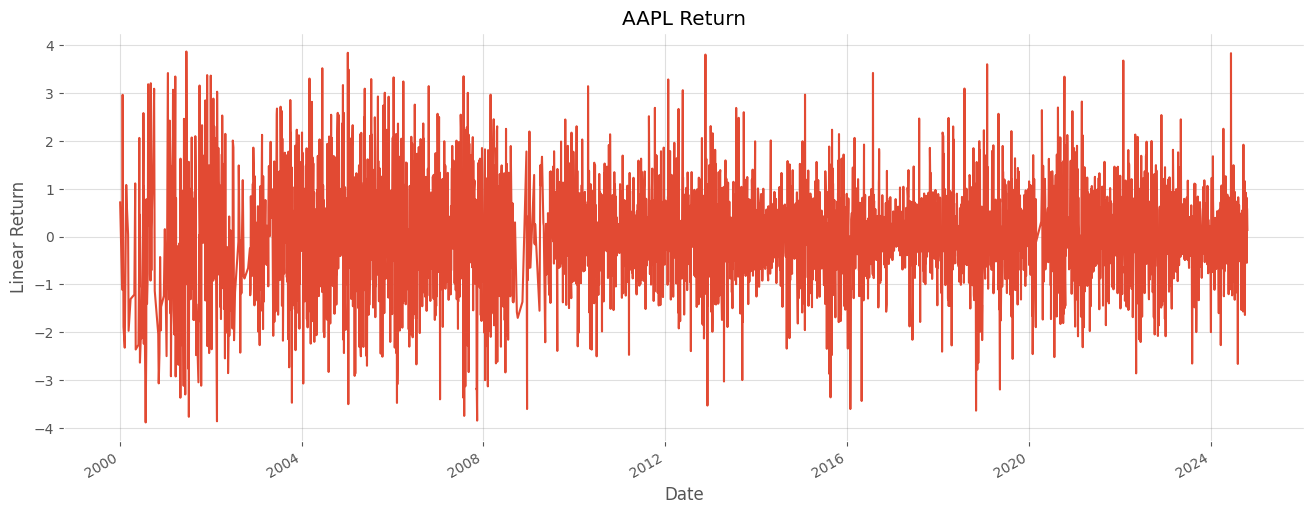

In [104]:
plt.figure(figsize = [16, 6]
          )

plt.title("AAPL Return")

plt.ylabel("Linear Return")

(
    scaled_SP500
    ["AAPL"]
    .plot()
)

### MODEL

#### Data Split

In [105]:
prop =\
    int(len(scaled_SP500) * 0.80)

X_Train = scaled_SP500[    : prop] # First 80% of the data
X_Test  = scaled_SP500[prop:     ] # Remaining 20% of the data

X_Train_Raw = Daily_Linear_Return[    :prop]
X_Test_Raw  = Daily_Linear_Return[prop:    ]

In [106]:
stock_tickers =\
(
 scaled_SP500
 .columns
 .values
)

stock_tickers

array(['AAPL', 'ABT', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP',
       'AES', 'AFL', 'AIG', 'ALL', 'AMAT', 'AMGN', 'AON', 'APA', 'APD',
       'AVY', 'AXP', 'AZO', 'BAC', 'BALL', 'BAX', 'BBY', 'BDX', 'BK',
       'MMM', 'MO', 'T'], dtype=object)

### Apply Principal Component Analysis

In [107]:
pca = PCA()

PrincipalComponent = pca.fit(X_Train)

#### First Principal Component /Eigenvector

In [108]:
pca.components_[0]

array([0.159, 0.171, 0.183, 0.191, 0.169, 0.21 , 0.189, 0.153, 0.145,
       0.152, 0.218, 0.191, 0.197, 0.176, 0.166, 0.201, 0.126, 0.216,
       0.212, 0.219, 0.14 , 0.209, 0.18 , 0.164, 0.155, 0.184, 0.218,
       0.221, 0.137, 0.164])

In [109]:
NumEigenValues = 10

<Axes: title={'center': 'Cumulative Explained Variance by Each PC'}>

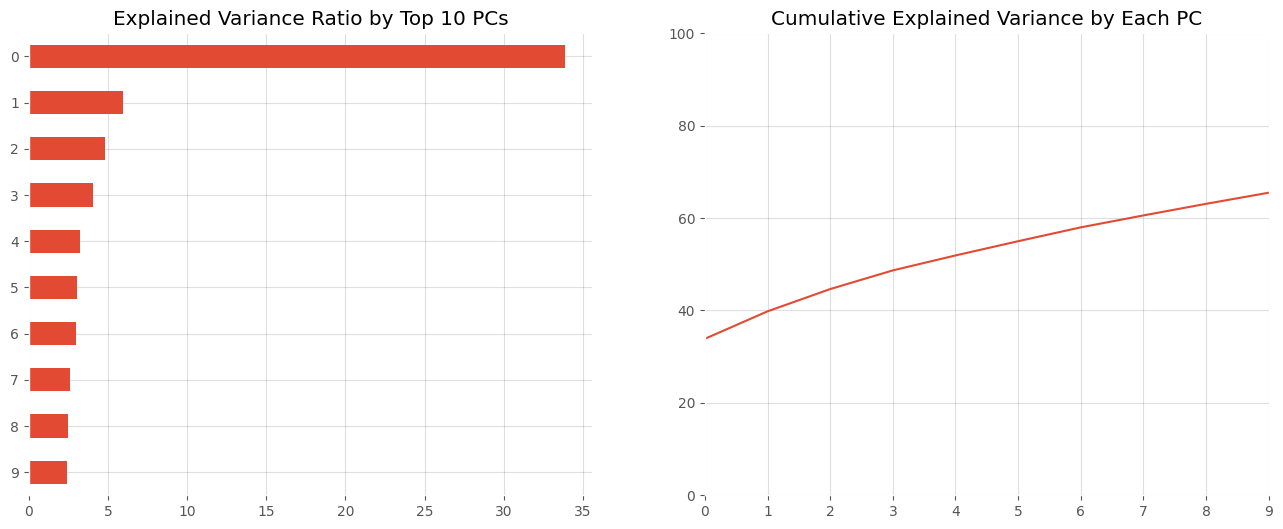

In [110]:
fig, axes =\
(
    plt
    .subplots(ncols = 2,
              figsize = [16, 6]
             )
)

# Plot on the left panel

Series1 =\
(
    pd
    .Series(pca
            .explained_variance_ratio_[ :NumEigenValues]
           )
    .sort_values()
    * 100
)

# Plot on the right panel

Series2 =\
(
    pd
    .Series(pca
            .explained_variance_ratio_[ :NumEigenValues]
           )
    .cumsum()
    * 100
)

(
    Series1
    .plot
    .barh(ylim = (0, 9),
          title = "Explained Variance Ratio by Top 10 PCs",
          ax = axes[0]
         )
)

(
    Series2
    .plot(ylim = (0, 100),
          xlim = (0, 9),
          title = "Cumulative Explained Variance by Each PC",
          ax = axes[1]
         )
)

In [111]:
(
    pd
    .Series(np
           .cumsum(pca
                   .explained_variance_ratio_)
           )
    .to_frame("Explained Variance")
    .head(NumEigenValues)
    .style
    .format("{:,.2%}".format)
)

,Explained Variance
0,33.88%
1,39.82%
2,44.64%
3,48.68%
4,51.91%
5,54.99%
6,57.99%
7,60.57%
8,63.08%
9,65.49%


### Portfolio Weights

In [112]:
def PCWeights():

    weights = pd.DataFrame()

    for i in range(len(pca.components_)
                  ):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i]
                                                                  )

    weights = weights.values.T
    return weights # Team, be careful with indentation

In [113]:
weights = PCWeights()

In [114]:
weights[0]

array([0.029, 0.032, 0.034, 0.035, 0.031, 0.039, 0.035, 0.028, 0.027,
       0.028, 0.04 , 0.035, 0.036, 0.033, 0.031, 0.037, 0.023, 0.04 ,
       0.039, 0.04 , 0.026, 0.039, 0.033, 0.03 , 0.029, 0.034, 0.04 ,
       0.041, 0.025, 0.03 ])

In [115]:
# Set the number of principal components to be considered
NumComponents = 5

# Extract the top principal components from the PCA object
# and create a DataFrame with columns named after the original features

topPortfolios =\
(
    pd
    .DataFrame(pca.components_[ : NumComponents],
               columns = PCA_price_data.columns)
)

# Normalize the weights of the top portfolios such that the weights sum up to 1 for each portfolio
# This is done by dividing each weight by the sum of weights for the respective portfolio

eigen_portfolios =\
(
    topPortfolios
    .div(topPortfolios.sum(1),
         axis = 0)
)

# Rename the index of the eigen_portfolios DataFrame for better readability

eigen_portfolios.index = [f"Portfolio {i}" for i in range(NumComponents)
                         ]

# Calculate the square root of the explained variance for each component
# This provides the standard deviation of returns for each eigenportfolio

np.sqrt(pca.explained_variance_)

array([3.155, 1.321, 1.19 , 1.089, 0.975, 0.951, 0.938, 0.871, 0.858,
       0.841, 0.829, 0.814, 0.804, 0.801, 0.772, 0.752, 0.738, 0.736,
       0.733, 0.727, 0.719, 0.708, 0.696, 0.688, 0.679, 0.647, 0.634,
       0.589, 0.568, 0.511])

In [116]:
eigen_portfolios

Ticker,AAPL,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,...,AZO,BAC,BALL,BAX,BBY,BDX,BK,MMM,MO,T
Portfolio 0,0.029444,0.031622,0.033840,0.035233,0.031128,0.038704,0.034905,0.028256,0.026680,0.028008,...,0.025844,0.038548,0.033264,0.030364,0.028666,0.034062,0.040257,0.040807,0.025317,0.030236
Portfolio 1,-1.102407,0.361755,-0.969230,-1.372555,0.339911,-0.129008,-0.946973,1.832591,1.879129,0.828258,...,-0.073770,-0.267278,0.303253,0.269832,-0.631896,0.169987,-0.135771,-0.052901,0.898358,0.516855
Portfolio 2,0.463446,0.414730,0.481084,0.427623,-0.134417,0.162618,0.290458,0.455182,0.527695,0.229012,...,0.077784,-0.910866,-0.008118,0.458152,-0.040674,0.465210,-0.730950,-0.024899,0.271299,0.088296
Portfolio 3,1.228608,-2.307371,0.779042,1.089960,0.272196,-0.406554,0.439114,1.485932,1.578456,2.664248,...,-0.427447,-0.024107,0.308152,-2.431869,0.980134,-2.038449,-0.388263,-0.253832,-0.695361,-0.398350
Portfolio 4,0.558970,-0.277061,-0.605549,-0.210836,-0.213171,0.063558,-0.536936,-0.119389,-0.019205,-0.319167,...,2.642137,-0.324438,0.012107,-0.595923,2.056903,-0.330055,-0.224255,-0.140973,0.890864,0.489889


In [117]:
eigen_portfolios.iloc[2]

Ticker
AAPL    0.463446
ABT     0.414730
ADBE    0.481084
ADI     0.427623
ADM    -0.134417
ADP     0.162618
ADSK    0.290458
AEE     0.455182
AEP     0.527695
AES     0.229012
AFL    -0.608095
AIG    -0.752309
ALL    -0.554817
AMAT    0.398281
AMGN    0.609107
AON    -0.263102
APA    -0.173597
APD    -0.073431
AVY    -0.112586
AXP    -0.432116
AZO     0.077784
BAC    -0.910866
BALL   -0.008118
BAX     0.458152
BBY    -0.040674
BDX     0.465210
BK     -0.730950
MMM    -0.024899
MO      0.271299
T       0.088296
Name: Portfolio 2, dtype: float64

array([[<Axes: title={'center': 'Portfolio 0'}, xlabel='Ticker'>],
       [<Axes: title={'center': 'Portfolio 1'}, xlabel='Ticker'>],
       [<Axes: title={'center': 'Portfolio 2'}, xlabel='Ticker'>],
       [<Axes: title={'center': 'Portfolio 3'}, xlabel='Ticker'>],
       [<Axes: title={'center': 'Portfolio 4'}, xlabel='Ticker'>]],
      dtype=object)

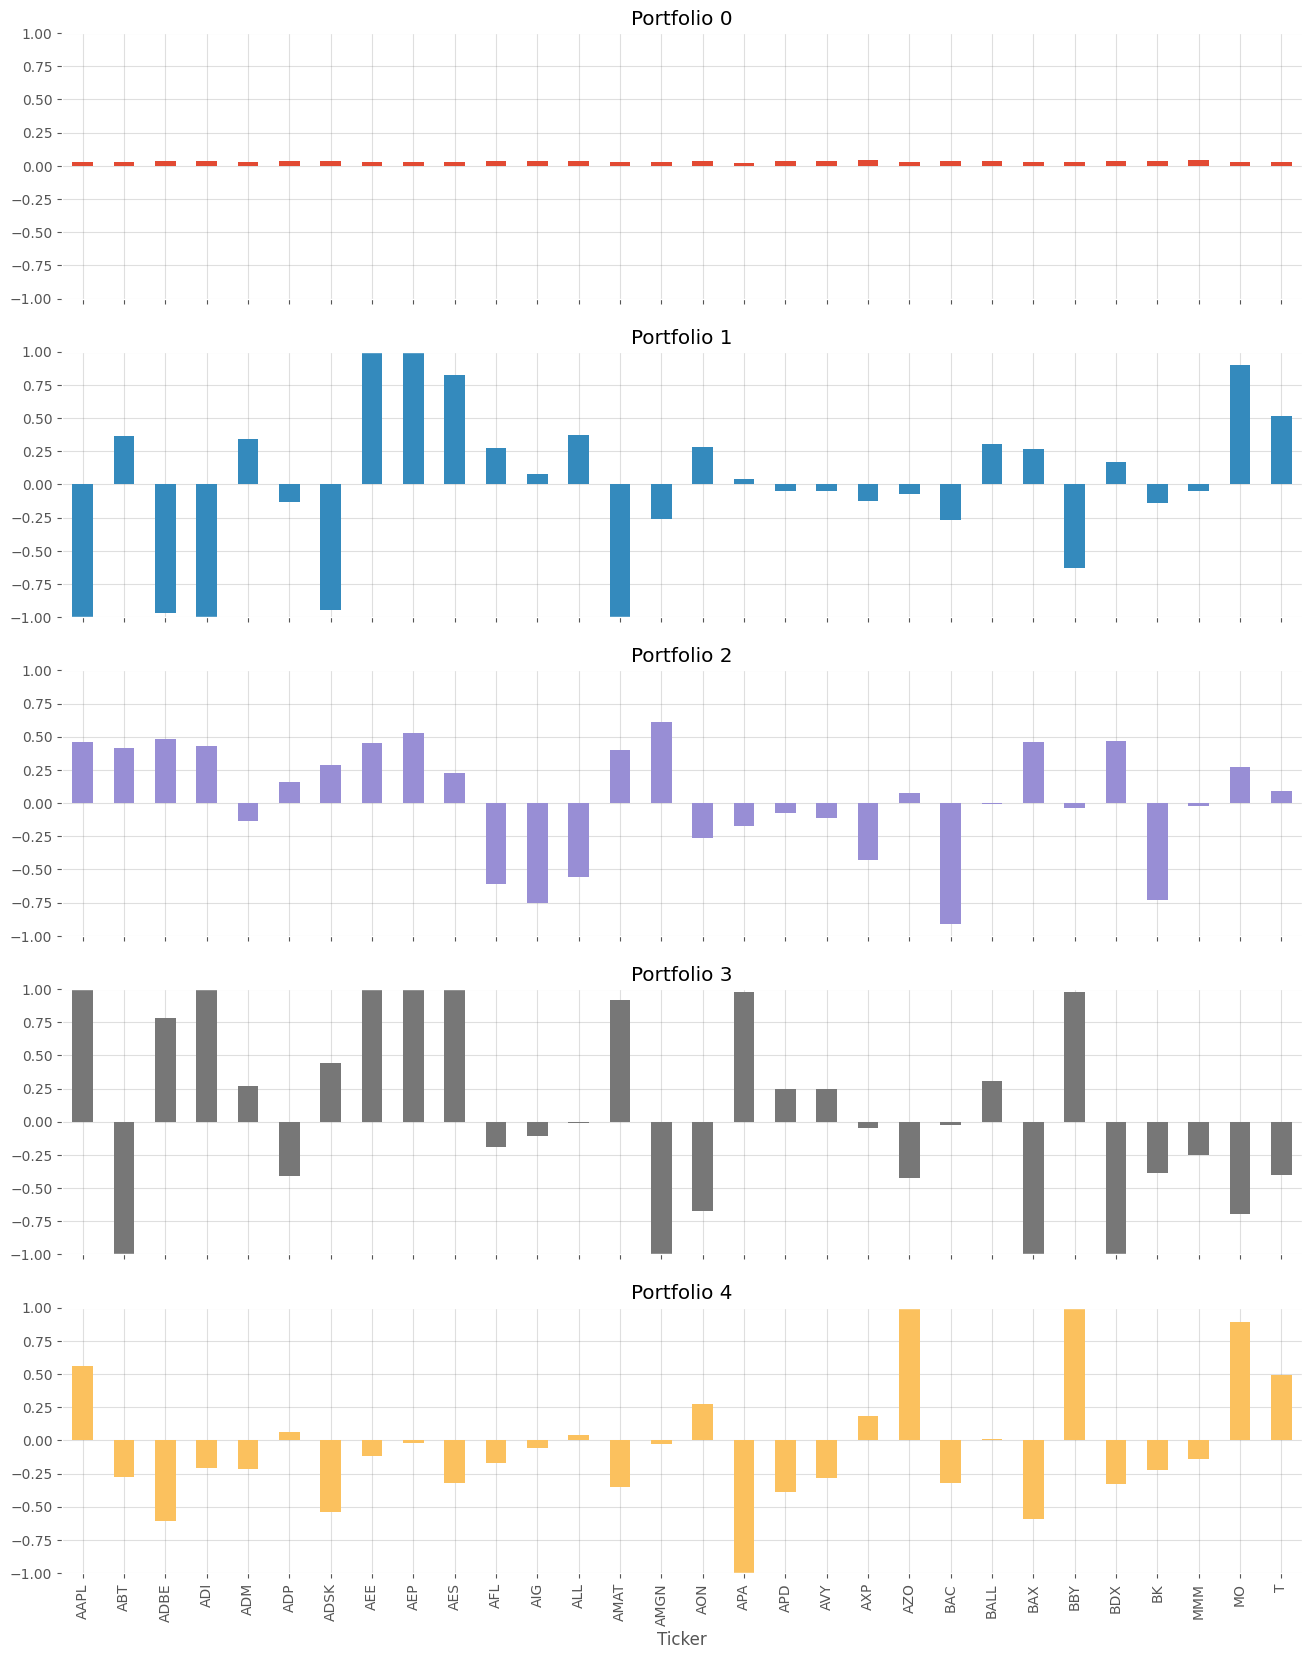

In [118]:
(
    eigen_portfolios
    .T  # Transpose the DataFrame to have portfolios as columns and assets as rows
    .plot
    .bar(subplots = True,
         layout = (int(NumComponents), 1),
         legend = False,
         sharey = True,
         figsize = [16, 20],
         ylim = [-1, 1]
        )
)

<Axes: xlabel='Ticker'>

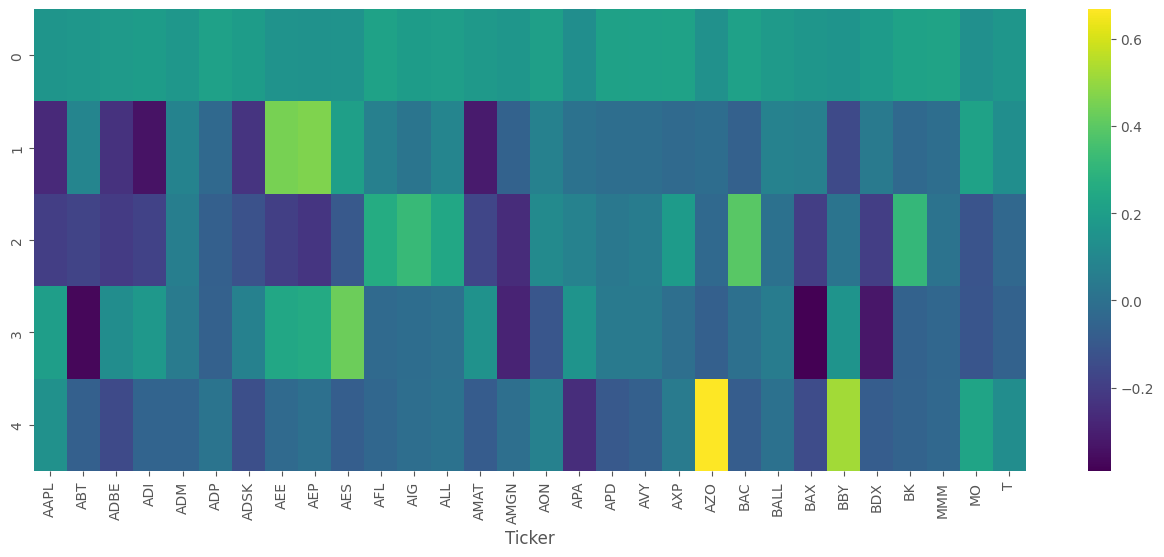

In [119]:
plt.figure(figsize = [16, 6]
          )

sns.heatmap(topPortfolios,
            cmap = "viridis")

## Determine best eigen portfolio

In [120]:
def calculate_sharpe_ratio(ts_returns, periods_per_year = 252):

    n_years = ts_returns.shape[0] / periods_per_year

    annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)
                                ) - 1

    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)

    annualized_sharpe = annualized_return / annualized_vol

    return annualized_return, annualized_vol, annualized_sharpe

In [121]:
def valid_backtest_PCA_porfolios(eigen):
    
    eigen_prtfi =\
        (
            pd
            .DataFrame(data = {"weights": eigen.squeeze()
                              },
                       index = stock_tickers)
        )

    # Sanity Check: Ensure the order of tickers in X_Test_Raw matches the order in eigen
    if not list(eigen_prtfi.index) == list(X_Test_Raw.columns): 
        raise ValueError("Sanity check failed: Mismatch in number of tickers between X_Test_Raw and eigen.")
    else:
        print("Prof. Roh's Message: 'Sanity check succeeded :)' The order of tickers in X_Test_Raw matches the order in eigen.")
    
    # Let's directly compute the dot product without sorting
    eigen_prtfi_returns =\
    (
        np
        .dot(X_Test_Raw, eigen)
    )
    
    eigen_portfolio_returns =\
    (
        pd
        .Series(eigen_prtfi_returns.squeeze(),
                index = X_Test_Raw.index)
    )

    returns, vol, sharpe = calculate_sharpe_ratio(eigen_portfolio_returns)

    print("Our PCA-based Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f"  %
          (returns * 100, vol * 100, sharpe)
         )

    # Compared with what? Equal-weightage Portfolio

    equal_weight_return =\
    (
        X_Test_Raw * (1 / len(pca.components_)
                     )
    ).sum(axis = 1)

    df_plot =\
        (
            pd
            .DataFrame({"ML Portfolio Return": eigen_portfolio_returns,
                        "Equal Weight Index": equal_weight_return},
                      index = X_Test.index
                      )
        )

    (
        np
        .cumprod(df_plot + 1)
        .plot(title = "Returns of the equal weighted index vs. Eigen-Portfolio",
              figsize = [16, 8]
             )
    )

    plt.show()

### <font color = red> Answer 7 is presented in the cell below: </font>

Prof. Roh's Message: 'Sanity check succeeded :)' The order of tickers in X_Test_Raw matches the order in eigen.
Our PCA-based Portfolio:
Return = 32.77%
Volatility = 14.30%
Sharpe = 2.29


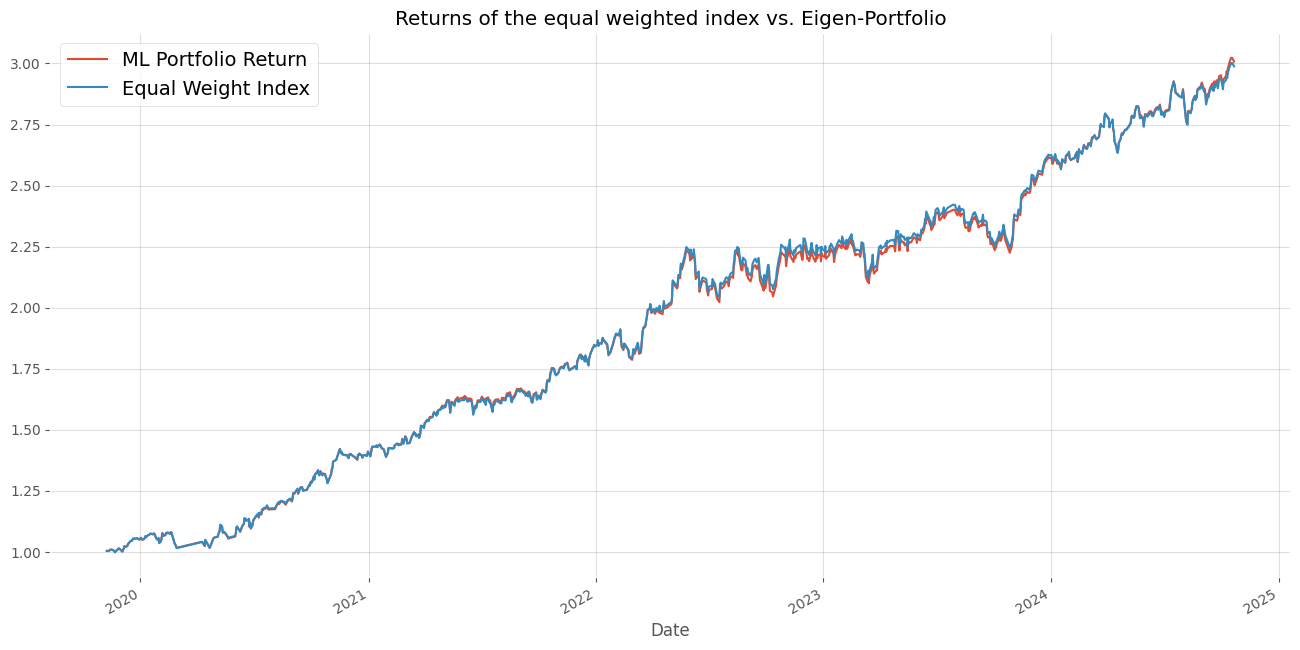

In [122]:
valid_backtest_PCA_porfolios(eigen = weights[0]
                             )

> 💯 “Thank you for putting your efforts into the individual assessment questions” 😊